### Импортируем библиотеки и загружаем данные

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
pd.set_option('display.max_colwidth', None)

In [216]:
df["Покупатель ФЛ"] = df["Покупатель ФЛ"].astype("Int64")
df["ID дом.рф"] = df["ID дом.рф"].astype("Int64")

In [56]:
# Заменяем строку "NaT" на реальный NaT
df['Дата регистрации'] = pd.to_datetime(df['Дата регистрации'], errors='coerce')

# Удаляем строки, где дата пустая (NaT/NaN)
df = df.dropna(subset=['Дата регистрации'])

print(f"Осталось строк после удаления пустых дат: {len(df_clean)}")

# numeric колонки
numeric_cols = ['Оценка цены']  # все numeric
text_cols = [c for c in df.columns if c not in numeric_cols]

# --- 1. Чистка текстовых колонок ---
for col in text_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('"', '""', regex=False)
        .str.replace("\r", " ", regex=False)
        .str.replace("\n", " ", regex=False)
        .str.strip()
    )

# --- 2. Чистка числовых колонок ---
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # NaN для пустых/нечисловых

# --- 3. Сохранение CSV ---
# Создаём CSV без кавычек для числовых полей и с минимальными кавычками для текстовых
with open("clean_for_copy.csv", "w", encoding="utf-8", newline='') as f:
    writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    # пишем заголовок
    writer.writerow(df.columns)
    # пишем строки
    for _, row in df.iterrows():
        # numeric поля → оставляем как есть (NaN → пустое поле)
        # текстовые поля → уже обработаны выше
        row_to_write = ["" if pd.isna(row[c]) else row[c] for c in df.columns]
        writer.writerow(row_to_write)

C:\Users\m.olshanskiy\AppData\Local\Temp\ipykernel_14384\2012816048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Дата регистрации'] = pd.to_datetime(df['Дата регистрации'], errors='coerce')


Осталось строк после удаления пустых дат: 899078


In [140]:
# Заменяем строку "NaT" на реальный NaT
df['Дата регистрации'] = pd.to_datetime(df['Дата регистрации'], errors='coerce')

# Удаляем строки, где дата пустая (NaT/NaN)
df = df.dropna(subset=['Дата регистрации'])

In [129]:
# --- df уже загружен ---

# 1. Определяем типы колонок
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
date_cols = df.select_dtypes(include=['datetime', 'datetime64[ns]']).columns.tolist()
text_cols = [c for c in df.columns if c not in numeric_cols + date_cols]

# 2. Чистка текстовых колонок
for col in text_cols:
    df[col] = (
        df[col].astype(str)
        .str.replace('"', '""', regex=False)   # экранируем кавычки
        .str.replace(r'[\r\n]+', ' ', regex=True)  # убираем переносы строк
        .str.strip()
    )

# 3. Преобразование числовых колонок
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # пустые/нечисловые → NaN

# 4. Преобразование дат
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # некорректные → NaT
    df[col] = df[col].dt.strftime('%Y-%m-%d')          # формат YYYY-MM-DD
    df[col] = df[col].fillna('')                        # NaT → пустое поле

# 5. Сохранение CSV безопасного для COPY
with open("clean_for_copy.csv", "w", encoding="utf-8", newline='') as f:
    writer = csv.writer(f, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
    writer.writerow(df.columns)  # заголовок
    for _, row in df.iterrows():
        # пустые значения numeric и date → пустое поле
        row_to_write = [("" if pd.isna(x) else x) for x in row]
        writer.writerow(row_to_write)

print("CSV готов для безопасного COPY в PostgreSQL.")

✅ CSV готов для безопасного COPY в PostgreSQL


In [137]:
row_index = 899076 # индексация с 0
print(df.iloc[row_index])

ID ЖК                                   6951
ЖК рус                    Яуза Парк (Мытищи)
Район Город                      Мытищи (г.)
Округ Направление          Ярославское шоссе
Регион                    Московская область
АТД                   Мытищи городской округ
Застройщик ЖК                            ПИК
Площадь                                 23.7
Комнатность                              NaN
Тип Комнатности                           ст
Тип помещения                       квартира
Корпус                             корпус 11
Покупатель ЮЛ        ООО "ПИК-ИИНВЕСТПРОЕКТ"
Дата регистрации         2024-12-16 00:00:00
Залогодержатель                          NaN
Тип обременения                          NaN
Оценка цены                        4511603.0
Купил лотов в ЖК                           9
класс                                комфорт
Ипотека                                    0
Name: 900161, dtype: object


In [127]:
for col in text_cols:
    df[col] = df[col].astype(str).str.replace('"', '""', regex=False)

In [53]:
df_clean.to_csv(
    r"C:\Users\m.olshanskiy\Desktop\Пыпин\пыпин3.csv",
    index=False,
    encoding="utf-8",
    sep=",", 
    quotechar='"',
    quoting=csv.QUOTE_ALL,  
    lineterminator="\n",
    na_rep=''
)

In [54]:
# numeric колонки
numeric_cols = ['Оценка цены']  # все numeric
text_cols = [c for c in df.columns if c not in numeric_cols]

# --- 1. Чистка текстовых колонок ---
for col in text_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('"', '""', regex=False)
        .str.replace("\r", " ", regex=False)
        .str.replace("\n", " ", regex=False)
        .str.strip()
    )

# --- 2. Чистка числовых колонок ---
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # NaN для пустых/нечисловых



In [41]:
# numeric колонки
numeric_cols = ['Оценка цены']  # все numeric
text_cols = [c for c in df.columns if c not in numeric_cols]

# Чистка текстовых колонок
for col in text_cols:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('"', '""', regex=False)
        .str.replace("\r", " ", regex=False)
        .str.replace("\n", " ", regex=False)
        .str.strip()
    )

# Чистка числовых колонок
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # пустые/нечисловые → NaN

In [27]:
# для всего датафрейма
df.replace('', np.nan, inplace=True)

In [46]:
row_index = 4205  # минус 1 для индексации с нуля
print(df.iloc[row_index])

ID ЖК                                  1697.0
ЖК рус                                  Авеню
Район Город                     Подольск (г.)
Округ Направление       Симферопольское шоссе
Регион                     Московская область
АТД                  Подольск городской округ
Застройщик ЖК             Строительный альянс
Площадь                                  46.4
Комнатность                               1.0
Тип Комнатности                             1
Тип помещения                        квартира
Корпус                               корпус 1
Покупатель ЮЛ                             nan
Дата регистрации                          NaT
Залогодержатель                           nan
Тип обременения                           nan
Оценка цены                               NaN
Купил лотов в ЖК                            2
класс                                 комфорт
Ипотека                                   0.0
Name: 4205, dtype: object


In [14]:
df_общий.tail(10)

,ID ЖК,ЖК рус,Район Город,Округ Направление,Регион,АТД,Застройщик ЖК,Площадь,Комнатность,Тип Комнатности,Тип помещения,Корпус,Покупатель ЮЛ,Дата регистрации,Залогодержатель,Тип обременения,Оценка цены,Купил лотов в ЖК,класс,Ипотека
1242587,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,32.0,1.0,1,квартира,корпус 1.1,NaN,2023-02-21,ВТБ,ипотека,7047397.0,1,эконом,1.0
1242588,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,36.0,NaN,1,квартира,корпус 1.1,NaN,2023-02-14,ВТБ,ипотека,7437066.0,2,эконом,1.0
1242589,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,34.2,NaN,1,квартира,корпус 1.1,NaN,2023-02-14,ДОМ.РФ БАНК,ипотека,7327360.0,1,эконом,1.0
1242590,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,34.2,NaN,1,квартира,корпус 1.1,NaN,2023-02-15,ВТБ,ипотека,7427910.0,1,эконом,1.0
1242591,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,55.7,NaN,2,квартира,корпус 1.1,NaN,2023-02-13,СБЕРБАНК,ипотека,10499800.0,1,эконом,1.0
1242592,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,51.0,2.0,2,квартира,корпус 1.1,NaN,2023-02-09,NaN,NaN,9700880.0,3,эконом,0.0
1242593,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,36.0,1.0,1,квартира,корпус 1.1,NaN,2023-02-06,СБЕРБАНК,ипотека,7375341.0,2,эконом,1.0
1242594,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,32.0,NaN,1,квартира,корпус 1.1,NaN,2023-02-06,СБЕРБАНК,ипотека,6938631.0,1,эконом,1.0
1242595,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,76.8,3.0,3,квартира,корпус 1.1,NaN,2023-01-30,ВТБ,ипотека,12089318.0,1,эконом,1.0
1242596,6659.0,Юнино,Щербинка,НАО,Новая Москва,НАО,ПИК,32.0,NaN,1,квартира,корпус 1.1,"ООО ""ПИК-ИИНВЕСТПРОЕКТ""",2023-01-13,NaN,NaN,6902784.0,3,эконом,0.0


In [36]:
def check_and_clear(val):
    if pd.isna(val):
        return val
    s = str(val)
    # Проверяем, есть ли символы, кроме цифр, запятой и точки
    if any(c not in '0123456789.,' for c in s):
        return ''
    return val.astype(float)

In [206]:
df_grouped = df_общий.groupby(df_общий['Дата обновления'].dt.to_period('M')).size().reset_index(name='Количество')
df_grouped

,Дата обновления,Количество
0,2024-12,92178


In [4]:
df = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\База по годам\2024\Добавить\07-08.2024_Новая Москва.xlsx")

In [5]:
df2 = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\База по годам\2024\Добавить\09-10.2024_Новая Москва.xlsx")

In [6]:
df3 = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\База по годам\2024\Добавить\11-12.2024_Новая Москва.xlsx")

In [7]:
df4 = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\База по годам\2024\Добавить\17092025_Элит_массив за весь период.xlsx")

In [53]:
df5 = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\База по годам\2023\2023 МО_changed-3.xlsx")

In [7]:
df6 = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\База по годам\2022\ст_2022.xlsx")

In [8]:
df7 = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\База по годам\2022\нов_2022.xlsx")

In [9]:
df8 = pd.read_excel(r"C:\Users\m.olshanskiy\Desktop\База по годам\2022\МО_2022.xlsx")

In [5]:
df_общий = pd.concat([df, df2], ignore_index=True)

In [5]:
df_общий = df_общий.drop(columns=['Секция', 'Этаж', 'Номер'], errors='ignore')

In [3]:
df_csv = pd.read_csv(r"C:\Users\m.olshanskiy\Desktop\realty_sold_05092025_M_light.csv", low_memory=False)

ParserError: Error tokenizing data. C error: Expected 2 fields in line 13295, saw 4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43636 entries, 0 to 43635
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Дата обновления                 43636 non-null  datetime64[ns]
 1   Название проекта                43636 non-null  object        
 2   на англ                         955 non-null    object        
 3   промзона                        4640 non-null   object        
 4   Местоположение                  43636 non-null  object        
 5   Метро                           41082 non-null  object        
 6   Расстояние до метро, км         41082 non-null  object        
 7   Время до метро, мин             41082 non-null  object        
 8   МЦК/МЦД/БКЛ                     42981 non-null  object        
 9   Расстояние до МЦК/МЦД, км       42981 non-null  object        
 10  Время до МЦК/МЦД, мин           40019 non-null  object        
 11  БК

In [285]:
count2 = df_общий.count().sum()

In [286]:
count2 - count1

np.int64(188222)

In [7]:
mask = (
    ((df_общий['Статус'] == 'Скоро') | (df_общий['Статус'] == 'скоро')) &
    (
        (df_общий['Цена лота, руб.'].notna() & (df_общий['Цена лота, руб.'] != 0)) |
        (df_общий['Цена со скидкой, руб.'].notna() & (df_общий['Цена со скидкой, руб.'] != 0))
    )
)

df_общий.loc[mask, 'Статус'] = 'в продаже'

In [16]:
df_общий[df_общий['Статус'] == 'скоро']

,Дата обновления,Название проекта,На англ,Промзона,Местоположение,Метро,"Расстояние до метро, км","Время до метро, мин",Мцк/мцд/бкл,"Расстояние до мцк/мцд, км",...,Договор,Тип помещения,Отделка,Кол-во комнат,"Площадь, кв.м","Цена кв.м, руб.","Цена лота, руб.","Скидка,%","Цена кв.м со ск, руб.","Цена со скидкой, руб."


In [17]:
df_общий['Скидка,%'] = pd.to_numeric(df_общий['Скидка,%'], errors='coerce')
df_общий.loc[df_общий['Скидка,%'] > 90, 'Скидка,%'] = np.nan

### Сохраняем в файл после всех манипуляций

In [43]:
df.to_excel(r"C:\Users\m.olshanskiy\Desktop\База по годам\2024\2024 МО.xlsx", index=False)

In [113]:
df_общий.to_csv(r'C:\Users\m.olshanskiy\Desktop\База по годам\22-24.csv', index=False, encoding='utf-8-sig')

In [141]:
df.to_csv(r"C:\Users\m.olshanskiy\Desktop\Пыпин\пыпин3.csv", index=False, encoding='utf-8-sig')

In [163]:
df2.columns = df2.columns.str.capitalize().str.strip()

In [164]:
df2 = df2.rename(columns={'Цена лота со ск, руб.': 'Цена со скидкой, руб.'})
df2 = df2.rename(columns={'Цена со ск, руб.': 'Цена со скидкой, руб.'})

### В столбцах с расстоянием и временем до метро, мцк, мцд удаляем текстовые значения и остальные приводим к значению float

In [185]:
columns_to_clean = [
    'Расстояние до метро, км',
    'Время до метро, мин',
    'Расстояние до мцк/мцд, км',
    'Время до мцк/мцд, мин',
    'Расстояние до бкл, км',
    'Время до бкл, мин'
]

for col in columns_to_clean:
    df_общий[col] = (
        df_общий[col]
        .astype(str)
        .str.replace(r'[^\d.,]', '', regex=True)
        .str.replace(',', '.', regex=False)
        .replace('', np.nan)
        .astype(float)
    )

In [186]:
mask = (
    (df_общий['Расстояние до метро, км'] > 50) |
    (df_общий['Время до метро, мин'] > 500) |
    (df_общий['Расстояние до мцк/мцд, км'] > 50) |
    (df_общий['Время до мцк/мцд, мин'] > 500) |
    (df_общий['Расстояние до бкл, км'] > 100) |
    (df_общий['Время до бкл, мин'] > 500)
)

df_общий.loc[mask, columns_to_clean] = np.nan

In [187]:
df_общий['Отделка'].unique()

array(['Без отделки', 'С отделкой', 'Предчистовая',
       'С отделкой и доп. опциями'], dtype=object)

In [190]:
df_общий['Местоположение'].unique()

array(['МО ближ', 'ТТК/МКАД', 'ТТК', 'СК/ТТК', 'за МКАД', 'МКАД', nan],
      dtype=object)

In [191]:
df_общий['Класс'].unique()

array(['Комфорт', 'Бизнес', 'Премиум', 'Стандарт'], dtype=object)

In [192]:
df_общий['Статус'].unique()

array(['в продаже', 'скоро'], dtype=object)

In [193]:
sorted(x for x in df_общий['Метро'].dropna().unique() if isinstance(x, str))

['Авиамоторная',
 'Автозаводская',
 'Академическая',
 'Алексеевская',
 'Алтуфьево',
 'Аминьевская',
 'Аннино',
 'Апрелевка',
 'Аэропорт',
 'Багратионовская',
 'Батюнино (2027 г.)',
 'Бауманская',
 'Бачуринская (планируется открытие)',
 'Беговая',
 'Беломорская',
 'Белорусская',
 'Беляево',
 'Бибирево',
 'Борисово',
 'Ботанический сад',
 'Братиславская',
 'Бульвар рокоссовского',
 'Бунинская аллея',
 'Бутово',
 'Бутырская',
 'Варшавская',
 'Ватутинки (2023)',
 'Вднх',
 'Верхние лихоборы',
 'Верхние лихобры',
 'Владыкино',
 'Водный стадион',
 'Войковская',
 'Волгоградский проспект',
 'Воробьевы горы',
 'Выставочная',
 'Говорово',
 'Давыдково',
 'Дмитровская',
 'Домодедовская',
 'Дубровка',
 'Калужская',
 'Кантемировская',
 'Киевская',
 'Кожуховская',
 'Коломенская',
 'Коммунарка',
 'Комсомольская',
 'Коптево',
 'Котельники',
 'Красногвардейская',
 'Краснопресненская',
 'Красные ворота',
 'Крылатское',
 'Кузьминки',
 'Кунцевская',
 'Ленинский проспект',
 'Лесопарковая',
 'Локомотив',
 'Ло

In [194]:
df_общий['Тип помещения'].unique()

array(['Квартиры', 'Апартаменты', 'Таун'], dtype=object)

In [195]:
df_общий['Тип помещения'].value_counts()

Тип помещения
Квартиры       85273
Апартаменты     6903
Таун               2
Name: count, dtype: int64

In [196]:
df_общий['Промзона'].unique()

array([nan, 'Промзона', 'Нежилое помещение', 'Свободный участок',
       'Ветхий фонд', 'Нет'], dtype=object)

In [197]:
df_общий['Эскроу'].unique()

array(['да', 'нет'], dtype=object)

In [198]:
df_общий['Стадия строительной готовности'].unique()

array(['фор', 'нулевой цикл', 'монтаж первых этажей',
       'монтаж последних этажей', 'монтаж средних этажей', 'введен',
       'благоустройство', 'реконструкция'], dtype=object)

In [199]:
df_общий['Договор'].unique()

array(['ДДУ', 'ДКП', 'ПДКП', 'ДКП будущей вещи', 'ДКП/УДДУ'], dtype=object)

In [134]:
columns_to_fix_dot = ['Расстояние до метро, км', 'Время до метро, мин',
                  'Расстояние до МЦК/МЦД, км', 'Время до МЦК/МЦД, мин', 'Расстояние до БКЛ, км', 'Время до БКЛ, мин',
                  'Площадь, кв.м', 'Цена кв.м, руб.', 'Цена лота, руб.', 'Скидка,%',
                  'Цена кв.м со ск, руб.', 'Цена со скидкой, руб.']

In [25]:
df_общий[df_общий['Кол-во комнат'] == '2 ур']

,Дата обновления,Название проекта,На англ,Промзона,Местоположение,Метро,"Расстояние до метро, км","Время до метро, мин",Мцк/мцд/бкл,"Расстояние до мцк/мцд, км",...,Договор,Тип помещения,Отделка,Кол-во комнат,"Площадь, кв.м","Цена кв.м, руб.","Цена лота, руб.","Скидка,%","Цена кв.м со ск, руб.","Цена со скидкой, руб."
27992,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,Без отделки,2 ур,114.81,NaN,12990000.0,NaN,NaN,12990000.0
27993,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,Без отделки,2 ур,82.86,NaN,10386711.0,NaN,NaN,10386711.0
27994,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,Без отделки,2 ур,50.40,NaN,8831053.0,NaN,NaN,8831053.0
27995,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,Без отделки,2 ур,79.53,NaN,10433132.0,NaN,NaN,10433132.0
27998,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,С отделкой,2 ур,45.48,NaN,8002061.0,NaN,NaN,8002061.0
27999,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,Без отделки,2 ур,114.81,NaN,13590000.0,NaN,NaN,13590000.0
28001,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,Без отделки,2 ур,56.38,NaN,9922500.0,NaN,NaN,9420000.0
28002,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,Без отделки,2 ур,45.41,NaN,8002061.0,NaN,NaN,8002061.0
28004,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,Без отделки,2 ур,56.38,NaN,9922500.0,NaN,NaN,9420000.0
28016,2025-07-01,Бакеево Парк,NaN,NaN,МО сред.,NaN,NaN,NaN,Крюково,8.0,...,ДКП,Квартиры,Без отделки,2 ур,84.74,NaN,13077043.0,NaN,NaN,13077043.0


In [167]:
sorted(x for x in df_общий['Кол-во комнат'].dropna().unique() if isinstance(x, str))

['2 2 ур',
 '2е',
 '2е 2 ур',
 '3 2 ур',
 '3е',
 '3е (терр.)',
 '3е 2 ур',
 '4 2 ур',
 '4е',
 '4е (терр.)',
 '4е 2 ур',
 '4еL (терр.)',
 '5 2 ур',
 '5е',
 '5е 2 ур',
 '5е терр.',
 '5еL (терр.)',
 '6е',
 '6е 2 ур',
 '7е',
 '7е 2 ур',
 '8е',
 '9е',
 'многокомн.',
 'пентхаус',
 'студия',
 'таунхаус']

In [168]:
# Словари и множества как в твоем коде
suffixes = [
    '(терр.)', '(терр.+бассейн)', '(терр)', ' терр', ' терр.', ' (антресоль)', ' (патио)', ' city house',
    ' (ситихаус)', '(терр.)', '(терр.)', 'тер.', '(антрессо ь)', 'турраса'
]

taun_variants = ['(таун)', 'таун', 'таунхаус', '(таунхаус)', 'таунхаусы', '(вилла)', 'таенхаес']

level_replacements = {
    'к2L': '2 ур',
    'л': '2 ур',
    'L': '2 ур',
    '2-ур': '2 ур',
    '2 ур.': '2 ур',
    '2 р.': '2 ур',
    '2ур.': '2 ур',
    '2ур': '2 ур',
    '2ур': '2 ур',
    'l': '2 ур'
}

def normalize(value):
    original = value
    if isinstance(value, str):
        val = value.strip()

        # Заменяем '6еL (терр.)' вручную (как у тебя)
        if val == '6еL (терр.)':
            val = '6еL'

        # Если есть любой из таунхаус-вариантов — заменяем всё значение
        if any(variant in val for variant in taun_variants):
            val = 'таунхаус'
        else:
            # Удаляем суффиксы
            for suffix in suffixes:
                if val.endswith(suffix):
                    val = val[:-len(suffix)].strip()
                    break

        # Заменяем 'ph' на 'пент.'
        if 'ph' in val:
            return 'пентхаус'
        if 'пент.' in val:
            return 'пентхаус'

        # Спец. случай для 'к2L'
        if 'к2L' in val:
            parts = val.split('к2L')
            if parts[0] and parts[0][-1].isdigit():
                val = f"{parts[0]} 2 ур{' '.join(parts[1:])}"
            else:
                val = ' '.join(parts) + ' 2 ур'

        # Остальные замены уровня
        for variant, replacement in level_replacements.items():
            if variant != 'к2L' and variant in val:
                val = val.replace(variant, replacement)

        # Перенос "2 ур" в конец
        if '2 ур' in val:
            parts = [p.strip() for p in val.split('2 ур') if p.strip()]
            count = val.count('2 ур')
            val = ' '.join(parts) + ' 2 ур' * count

        val = val.replace('4е2 2 ур', '4е 2 ур')
        val = val.replace('2 4e 2 ур', '4e 2 ур')
        val = val.replace('6е (терр.) 2 ур', '6е 2 ур')
        val = val.replace('пентхаусы', 'пентхаус')
        val = val.replace('3к', '3')
        val = val.replace('e', 'е')  # латинскую 'e' на кириллическую
        val = val.replace('st2', 'студия')
        val = val.replace('8е3', '8е')
        val = val.replace('t', 'е')
        val = val.replace('у', 'е')
        val = val.replace('стедия', 'студия')
        val = val.replace('ер', 'ур')
        val = val.replace('пентхаес', 'пентхаус')
        val = val.replace('0x2a', 'студия')
        val = val.replace('st', 'студия')
        val = val.replace('0', 'студия')
        val = val.replace('mr', 'многокомн')
        val = val.replace('таенхаес', 'таунхаус')
        val = val.replace('1студияе 2 ур', 'студия 2 ур')
        
        

        

        
        
        
        val = val.strip()

        try:
            return int(val)
        except ValueError:
            return val
    else:
        return value  # уже int


In [169]:
df_общий['Кол-во комнат'] = df_общий['Кол-во комнат'].str.replace(r'(\([^)]*\))', '', regex=True).str.lower()

In [170]:
df_общий['Кол-во комнат'] = df_общий['Кол-во комнат'].apply(normalize)

In [139]:
for col in columns_to_fix_dot:
    df[col] = df[col].astype(str).str.replace(',', '.', regex=False).apply(check_and_clear)

AttributeError: 'str' object has no attribute 'astype'

In [140]:
df_общий['Округ'].unique()

array(['Люберецкий', 'Мытищинский', 'Ленинский', 'ЗАО', 'Химкинский',
       'ВАО', 'Красногорский', 'ЮЗАО', 'СВАО', 'САО', 'ЮВАО', 'ЮАО',
       'ЦАО', 'СЗАО', 'Одинцовский', 'ЗелАО', 'Котельники',
       'Наро-Фоминский', 'Лыткарино', 'Раменский', 'Балашихинский',
       'Королев', 'Реутов', 'НАО', 'ТАО', nan], dtype=object)

In [200]:
df_общий['Конструктив'].unique()

array(['Монолит', 'Панель', 'Кирпич', 'Пик', 'Сэм'], dtype=object)

In [183]:
df_общий['Конструктив'] = df_общий['Конструктив'].replace(r'(?i)^пик[\s\-]?\d*$', 'Пик', regex=True)

In [201]:
sorted(x for x in df_общий['Район'].dropna().unique() if isinstance(x, str))

['Академический',
 'Алексеевский',
 'Алтуфьевский',
 'Апрелевка',
 'Аристово',
 'Аэропорт',
 'Бабушкинский',
 'Балашиха',
 'Балашихинский',
 'Басманный',
 'Беговой',
 'Бескудниковский',
 'Бибирево',
 'Бирюлево Восточное',
 'Богородское',
 'Булатниковское',
 'Бутырский',
 'Видное',
 'Внуковское',
 'Войковский',
 'Гагаринский',
 'Глухово',
 'Головинский',
 'Гольяново',
 'Горки Ленинские',
 'Горское',
 'Даниловский',
 'Дер. Марусино',
 'Десеновское',
 'Дзержинский',
 'Дмитровский',
 'Донской',
 'Дорогомилово',
 'Егорово',
 'Жабкино',
 'Жаворонковское',
 'Замоскворечье',
 'Западное Дегунино',
 'Заречье',
 'Ильинское',
 'Клязьма-Старбеево',
 'Кокошкино',
 'Коньково',
 'Коптево',
 'Косино-Ухтомский',
 'Котельники',
 'Котловка',
 'Красногорск',
 'Красногорский',
 'Краснопахорский',
 'Красносельский',
 'Крылатское',
 'Крюково',
 'Кузьминки',
 'Кунцево',
 'Куркино',
 'Левобережный',
 'Ленинский',
 'Лефортово',
 'Лыткарино',
 'Люберцы',
 'Люблино',
 'Малаховка',
 'Марушкинское',
 'Марфино',
 'Ма

### Приведём к числовому виду столбцы с ценами, а также избавимся от лишних пробелов и знаков
### Поправим значения по отделке 

In [171]:
df_общий["Цена лота, руб."] = pd.to_numeric(
    df_общий["Цена лота, руб."].astype(str).str.replace(r"[^\d,\.]", "", regex=True).str.replace(",", "."),
    errors="coerce"
)
df_общий["Цена со скидкой, руб."] = pd.to_numeric(
    df_общий["Цена со скидкой, руб."].astype(str).str.replace(r"[^\d,\.]", "", regex=True).str.replace(",", "."),
    errors="coerce"
)
df_общий["Цена кв.м со ск, руб."] = pd.to_numeric(
    df_общий["Цена кв.м со ск, руб."].astype(str).str.replace(r"[^\d,\.]", "", regex=True).str.replace(",", "."),
    errors="coerce"
)

In [172]:
df_общий["Класс"] = df_общий["Класс"].str.strip().str.capitalize().str.replace('Типовой', 'Стандарт')
df_общий['Тип помещения'] = df_общий['Тип помещения'].str.strip().str.capitalize().replace('Квартира', 'Квартиры')
df_общий['Статус'] = df_общий['Статус'].str.strip().replace('приостановлен', 'продажи приостановлены')
df_общий['Эскроу'] = df_общий['Эскроу'].str.strip().str.lower()
df_общий['Стадия строительной готовности'] = df_общий['Стадия строительной готовности'].str.strip().str.lower()
df_общий['Договор'] = df_общий['Договор'].str.strip().replace('дду', 'ДДУ').replace('бронирование', np.nan).replace('благоустройство', np.nan).replace('в продаже', np.nan)


In [173]:
промзона_dict = {
    'Нежилые здания' : 'Нежилое помещение',  
    'Нежилое здание' : 'Нежилое помещение', 
    'Нежилые помещения' : 'Нежилое помещение',
    'Нежилые' : 'Нежилое помещение',
    'Нежлые здания' : 'Нежилое помещение',
    'Жилые здания' : 'Жилое здание',
    'Жилой дом' : 'Жилое здание',
    'Лесопарковая зона' : 'Свободный участок', 
    'Свободная площадка' : 'Свободный участок', 
    'Участок' : 'Свободный участок',
    'Да' : 'Промзона',
    'Промона' : 'Промзона',
    'Свободынй земельный участок' : 'Свободный земельный участок'    

    
}

df_общий['Промзона'] = df_общий['Промзона'].str.strip().str.capitalize().replace(промзона_dict)

In [174]:
метро_dict = {
    'Авиамторная' : 'Авиамоторная',
    'Акажемическая' : 'Академическая',
    'Бабшкинская' : 'Бабушкинская',
    'Варшавская (закрыта)' : 'Варшавская',
    'Верхние Лихобры' : 'Верхние Лихоборы',
    'Днамо' : 'Динамо',  
    'Медветково' : 'Медведково',
    'Мичуринский просрект' : 'Мичуринский проспект',
    'Нахимоовский проспект' : 'Нахимовский проспект',
    'Перовский парк' : 'Петровский парк',
    'Пятницкое шосс' : 'Пятницкое шоссе',
    'Рассказово' : 'Рассказовка',
    'Строгиер' : 'Строгино',
 
 

    
}

df_общий['Метро'] = df_общий['Метро'].str.strip().str.capitalize().replace(метро_dict)

In [175]:
заменяемые_значения_опции = [
    'С отделкой, кухней и мебелью', 'С отделкой и мебелью',
    'С отделкой, кухней и техникой', 'С отделкой, мебелью и кухней',
    'С отделкой и кухней', 'C отделкой и мебелью',
    'С отделкой,мебель и техника', 'С отделкой,кухня,мебель',
    'С отделкой и доп.опциями', 'С отделкой, мебелью и техникой', 
    'С отделкой, кухнеи и мебелью', 'С отделкой и  кухней', 
    'С отделкой и кухня', 'С отделкой,кухня', 'С отделкой, сантехникой',
    'С отделкой с кухней и мебелью в ванной', 'С отделкой и кухней и мебелью в ванной',
    'С отделкой и мебелировкой', 'С отделкой,мебель',
    'С отделкой и мебель', 'С отделкой,кухня и техника', 
    'С отделкой, кухней и мбелью', 'С отделкой и кухней,мебель', 
    'С отделкой,кухня,шкафы', 'С мебелью', 'С мебелью и кухней',
    'С отделкой ,мебель', 'С отделкой,кухня и мебель', 'С отделкой мебель',
    'С отделкой,кухня,техника', 'С оделкой, кухней и техникой',
    'С отделкой и кухней без техники', 'С отделкой,кухней и техникой',
    'С отделкой,мебель,техника', 'С отделкой (мебель и техника)', 
    'С отделкой и сантехникой', 'Меблировка', 'Чистовая с мебелью',
    'Modern_style_turnkey_furniture', 'Neoclassical_furniture', 
    'Finishingkitchen', 'Кухня под ключ', 'С отделкой, с меблировкой',
    'С отделкой и допопциями',
]

заменяемые_значения_отделка = {'С отделкой,машиноместо' : 'С отделкой',
       'Предчистовая,машиноместо' : 'Предчистовая',
        'Без отделки,машиноместо' : 'Без отделки',
       'Предчистовая и м/м' : 'Предчистовая', 
        'С отделкой и м/м' : 'С отделкой',
        'Чистовая' : 'С отделкой',
       'Без отделки, м/м входит' : 'Без отделки',
        'без отделки' : 'Без отделки',
        'с отделкой' : 'С отделкой',
        'Без отделкт' : 'Без отделки',
        'Сотделкой' : 'С отделкой'  ,
        'Предчистова' : 'Предчистовая',
        'Отделка' : 'С отделкой',
        'Нет' : 'Без отделки',
        'Сотделкой' : 'С отделкой',
        'С отделкой и доп опциями' : 'С отделкой и доп. опциями',
        'White box' : 'Предчистовая',
        'Mr base' : 'Предчистовая',
        'Mr ready' : 'С отделкой',
        'White-box' : 'Предчистовая',
        'Предварительная' : 'Предчистовая',
        'Whitebox' : 'Предчистовая',
        'Отделка white box' : 'Предчистовая',
        'Модерн' : 'С отделкой',
        'Классика' : 'С отделкой',
        'Предчистовая отделка' : 'Предчистовая',
        'Дизайнерский ремонт' : 'С отделкой',
        'Да' : 'С отделкой',
        'Чистовая отделка' : 'С отделкой',
        'Modern_style' : 'С отделкой',
        'Дизайнерская отделка' : 'С отделкой',
        'White box max' : 'Предчистовая',
        'Купите сейчас - платите потом' : np.nan,
       'Бонусная программа от гк фск' : np.nan,
        'Живите сейчас - платите потом' : np.nan,
       'Скидка' : np.nan, 'Рассрочка 0%' : np.nan,
                               
                               
                               
    
                             }


       
      
      
       
       
       




df_общий['Отделка'] = df_общий['Отделка'].str.strip().str.capitalize()
df_общий['Отделка'] = df_общий['Отделка'].replace(заменяемые_значения_опции, 'С отделкой и доп. опциями')
df_общий["Отделка"] = df_общий["Отделка"].replace(заменяемые_значения_отделка)

In [176]:
монолит = ['Монолит-кирпич', 'Монолит-железобетон', 'Монолит-каркас', 'Монолитно-кирпичный',
           'Монолит-кипич', 'Монолитно-кирпич', 'Монолит кирпич', 'Монолит жб', 
           'Монолит железобетон', 'Монолитный железобетон']
df_общий['Конструктив'] = df_общий['Конструктив'].str.strip().str.capitalize().replace(монолит, 'Монолит')

In [177]:
округа_dict = {
    'Мытищи': 'Мытищинский',
    'Красногорск': 'Красногорский',
    'Люберцы': 'Люберецкий',
    'Вёшки': 'Вешки',
    'Химки': 'Химкинский',
    'Вешки': 'Мытищинский',
    'Видное' : 'Ленинский'
}

df_общий['Округ'] = df_общий['Округ'].str.strip().str.title().replace(округа_dict)

# список округов, которые нужно сделать заглавными
okruga = ['Нао', 'Тао', 'Юао', 'Ювао', 'Зао', 'Юзао', 'Сзао', 'Свао', 'Вао', 'Сао', 'Цао', 'Зелао']

# приведение к верхнему регистру только для нужных значений
df_общий['Округ'] = df_общий['Округ'].apply(lambda x: x.upper() if x in okruga else x).replace('ЗЕЛАО', 'ЗелАО')

In [178]:
район_dict = {
    'Новомытищинский Пр-Т, 2Б' : 'Мытищинский',
    'Кляьма-Старбеево': 'Клязьма-Старбеево',
    'Ленинский Район': 'Ленинский',
    'Преображенской': 'Преображенское',
    'Хорошёвский': 'Хорошевский',    
}

df_общий['Район'] = df_общий['Район'].str.strip().str.title().replace(район_dict)

In [189]:
местоположение_dict = {
    'Садовое кольцо / ТТК' : 'СК/ТТК',
    'ТТК/СК' : 'СК/ТТК',
    'От ТТК до МКАД' : 'ТТК/МКАД',
    'на МКАД' : 'МКАД',
    'МО ближ' : 'МО ближ.',
    'ТТК / МКАД' : 'ТТК/МКАД',
    'на СК' : 'СК',
    'на ТТК' : 'ТТК',
    'у МКАД' : 'МКАД',
    'От ТТК до МКАД' : 'ТТК/МКАД',
    'МО ближ.' : 'МО ближ'
}

df_общий['Местоположение'] = df_общий['Местоположение'].str.strip().replace(местоположение_dict)

In [180]:
стадии_dict = {
    'монтаж нижних этажей' : 'монтаж первых этажей',
    'монтаж верхних этажей' : 'монтаж последних этажей',
    'сдан' : 'введен',
     'нулевой цткл' : 'нулевой цикл',
     'монтаж последнихх этажей' : 'монтаж последних этажей',
     'мнтаж средних этажей' : 'монтаж средних этажей',
     'нулевой цил' : 'нулевой цикл',
     'монтаж среднихэтажей' : 'монтаж средних этажей',
      'монтаж послдених этажей' : 'монтаж последних этажей', 
    
}

df_общий['Стадия строительной готовности'] = df_общий['Стадия строительной готовности'].str.strip().replace(стадии_dict).replace('предчистовая', np.nan)



### Заполним значениями столбцы Цена кв.м со ск, руб. и Цена кв.м, руб. Также создаём новый столбец, в котором будет минимальная цена из этих двух столбцов

In [181]:
df_общий['Цена кв.м со ск, руб.'] = (df_общий["Цена со скидкой, руб."]/df_общий["Площадь, кв.м"]).round()
df_общий['Цена кв.м, руб.'] = (df_общий["Цена лота, руб."]/df_общий["Площадь, кв.м"]).round()

In [6]:
df["Цена кв.м (минимальная)"] = df["Цена кв.м, руб."].combine_first(df["Цена кв.м со ск, руб."])

### Проверим какие строки содержат нулевую цену со скидкой и без скидки и имеют статус в продаже

In [79]:
mask = ((df_общий["Цена со скидкой, руб."] == 0) | (df_общий["Цена со скидкой, руб."].isna())) & (df_общий["Статус"] == "в продаже")
df_общий[mask]

,Дата обновления,Название проекта,На англ,Промзона,Местоположение,Метро,"Расстояние до метро, км","Время до метро, мин",Мцк/мцд/бкл,"Расстояние до мцк/мцд, км",...,Договор,Тип помещения,Отделка,Кол-во комнат,"Площадь, кв.м","Цена кв.м, руб.","Цена лота, руб.","Скидка,%","Цена кв.м со ск, руб.","Цена со скидкой, руб."


### Удалим эти строки

In [78]:
df_общий = df_общий[~(
    ((df_общий["Цена со скидкой, руб."] == 0) | (df_общий["Цена со скидкой, руб."].isna())) &
    (df_общий["Статус"] == "в продаже")
)]

### Приведём столбец 'Дата обновления' к числовому формату данных

In [53]:
df_общий['Дата обновления'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df_общий['Дата обновления'], unit='D')

TypeError: dtype datetime64[ns] cannot be converted to timedelta64[ns]

In [44]:
print(df_общий['Старт'].head(10))
print(df_общий['Старт'].apply(type).value_counts())

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Старт, dtype: object
Старт
<class 'float'>    183644
<class 'int'>       30034
<class 'str'>         167
Name: count, dtype: int64


In [82]:
df_общий['Дата обновления'] = pd.to_datetime(df_общий['Дата обновления'], errors='coerce')

C:\Users\m.olshanskiy\AppData\Local\Temp\ipykernel_15372\2630030072.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_общий['Дата обновления'] = pd.to_datetime(df_общий['Дата обновления'], errors='coerce')


In [182]:
df_общий['Старт'] = pd.to_datetime(df_общий['Старт'], errors='coerce')

In [84]:
# Убедимся, что значение — число и в разумных пределах
mask = df_общий['Старт'].apply(
    lambda x: isinstance(x, (int, float, np.integer, np.floating)) and x < 60000
)

# Преобразуем только допустимые значения
df_общий.loc[mask, 'Старт'] = (
    pd.to_datetime('1899-12-30') + pd.to_timedelta(df_общий.loc[mask, 'Старт'], unit='D')
)
df_общий.loc[~mask, 'Старт'] = pd.NaT  # если хочешь убрать проблемные

TypeError: dtype datetime64[ns] cannot be converted to timedelta64[ns]

### Устанавливаем нужные фильтры, например месяц, округа

In [26]:
# df = df[(df['Дата обновления'].dt.month == 6)]  
df = df[df['Округ'].isin(['ВАО', 'ЗАО', 'САО', 'СВАО', 'СЗАО', 'ЦАО', 'ЮАО', 'ЮВАО', 'ЮЗАО'])]  # оставляем только старую Москву


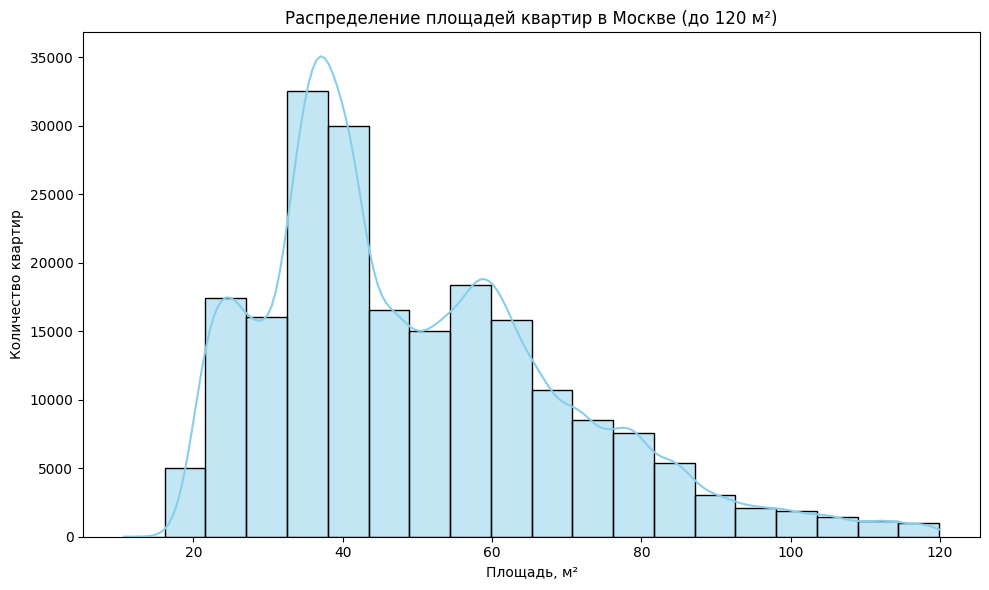

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df["Площадь, кв.м"] < 120]["Площадь, кв.м"], bins=20, kde=True, color="skyblue")
plt.title("Распределение площадей квартир в Москве (до 120 м²)")
plt.xlabel("Площадь, м²")
plt.ylabel("Количество квартир")
plt.tight_layout()
plt.show()

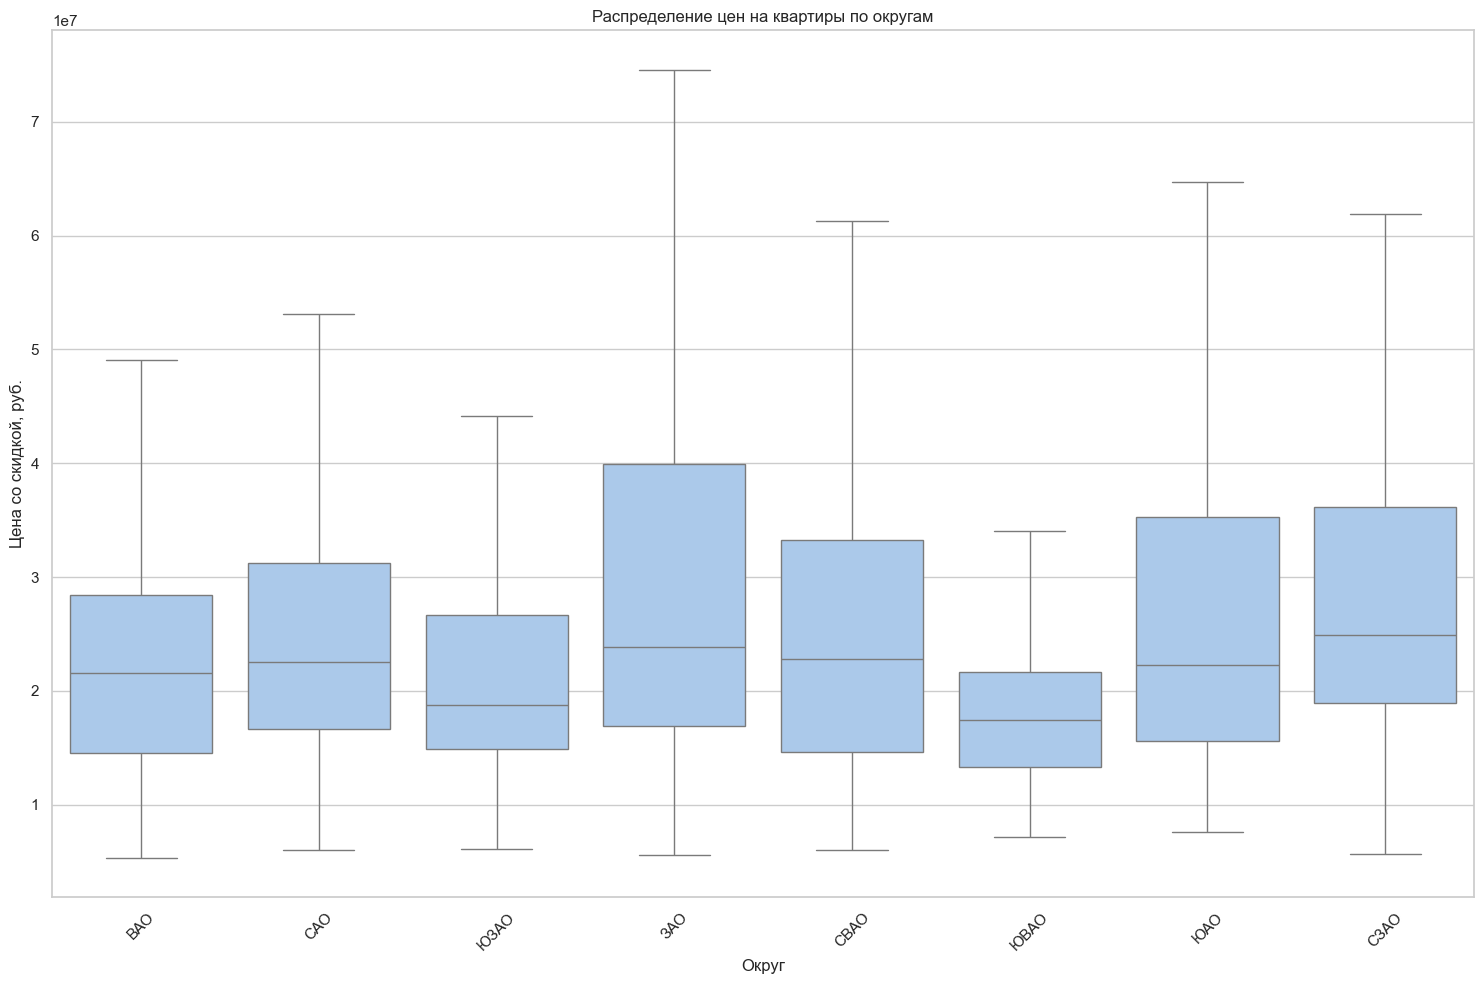

In [29]:
df_without_centr = df[df['Округ'].isin(['ВАО', 'ЗАО', 'САО', 'СВАО', 'СЗАО', 'ЮАО', 'ЮВАО', 'ЮЗАО'])]
sns.set(style="whitegrid")
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_without_centr, x="Округ", y="Цена со скидкой, руб.", showfliers=False)
plt.xticks(rotation=45)
plt.title("Распределение цен на квартиры по округам")
plt.tight_layout()
plt.show()

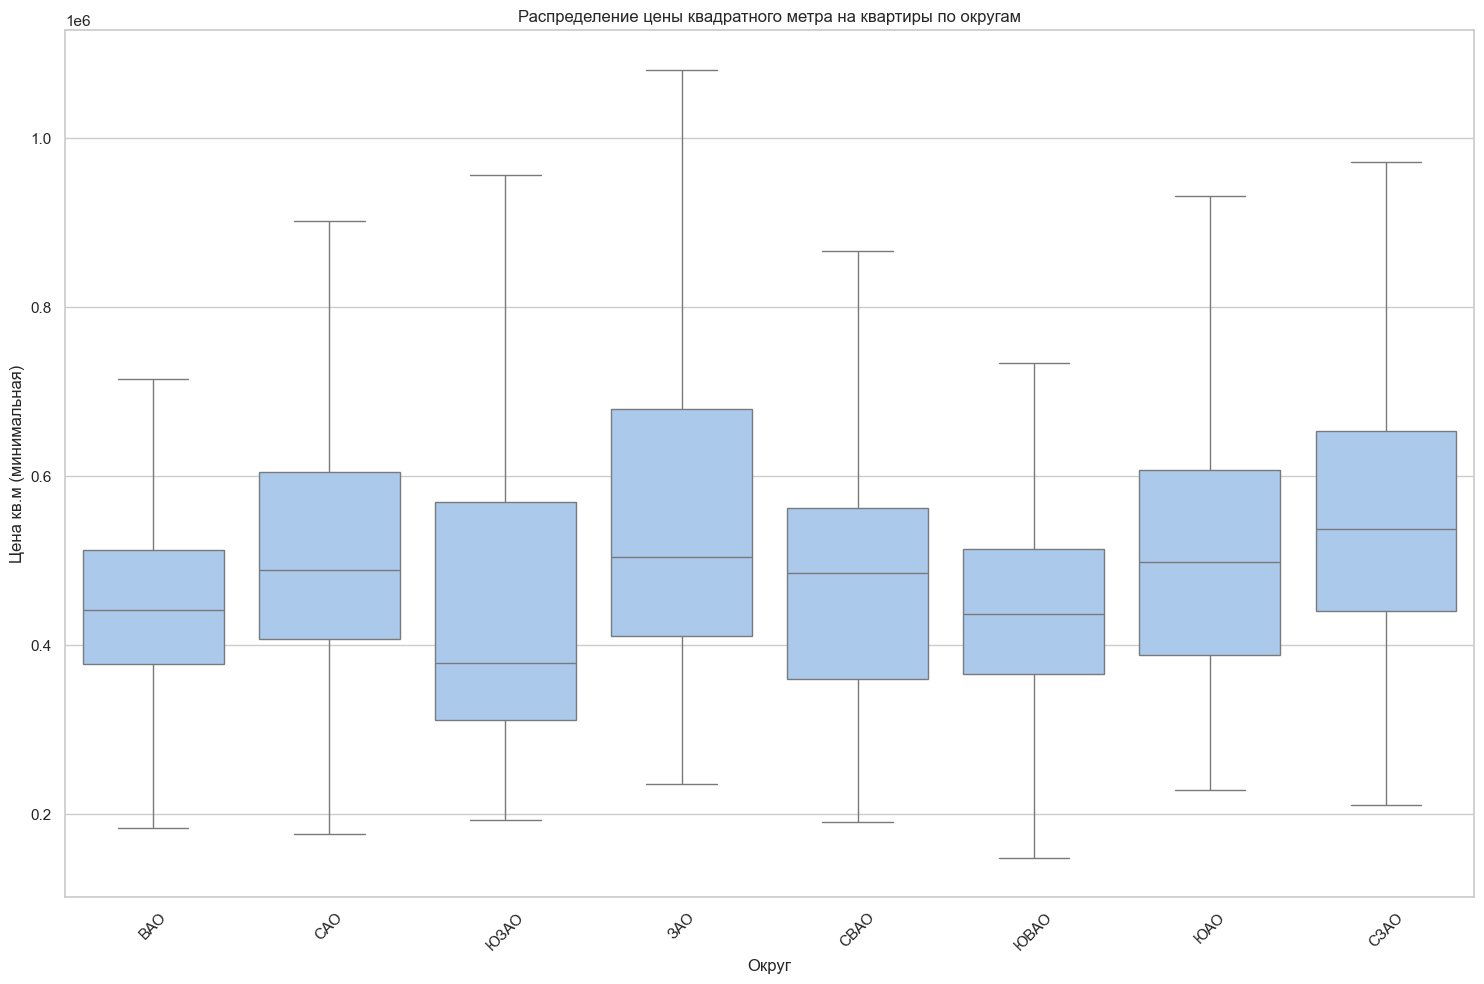

In [30]:
sns.set(style="whitegrid")
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(15, 10))
sns.boxplot(data=df_without_centr, x="Округ", y="Цена кв.м (минимальная)", showfliers=False)
plt.xticks(rotation=45)
plt.title("Распределение цены квадратного метра на квартиры по округам")
plt.tight_layout()
plt.show()

C:\Users\m.olshanskiy\AppData\Local\Temp\ipykernel_21248\3220810891.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['цена_за_м2'] = df_top['Цена со скидкой, руб.'] / df_top['Площадь, кв.м']


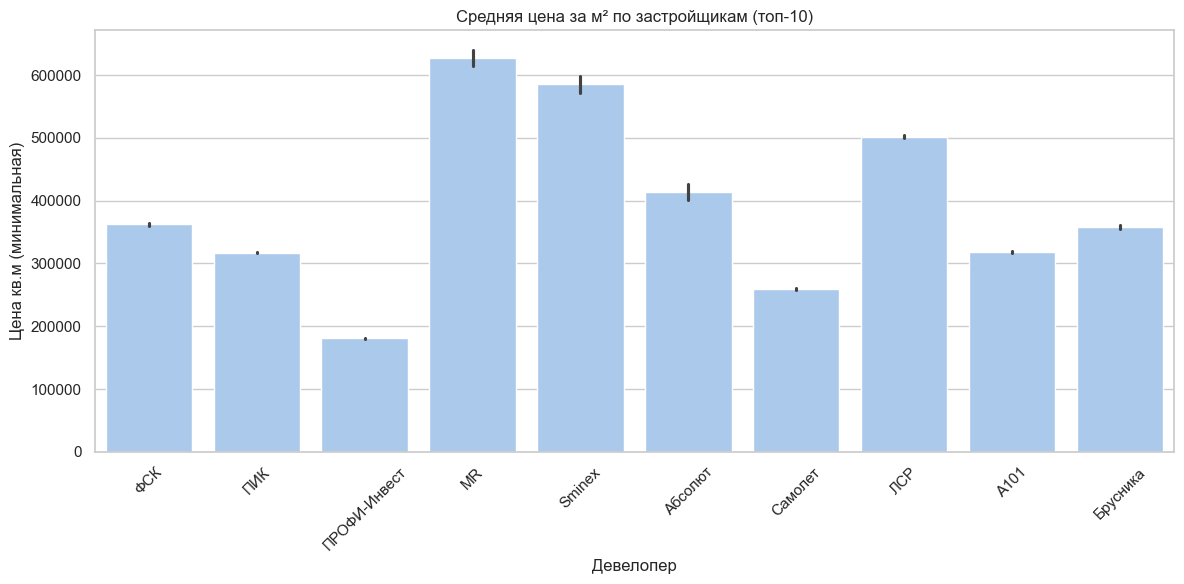

In [14]:
top_builders = df['Девелопер'].value_counts().head(10).index
df_top = df[df['Девелопер'].isin(top_builders)]
df_top['цена_за_м2'] = df_top['Цена со скидкой, руб.'] / df_top['Площадь, кв.м']

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top, x="Девелопер", y="Цена кв.м (минимальная)", estimator='mean')
plt.xticks(rotation=45)
plt.title("Средняя цена за м² по застройщикам в старой Москве (топ-10)")
plt.tight_layout()
plt.show()

In [42]:
top_builders_without_centr = df_without_centr['Девелопер'].value_counts().head(10).index
df_top2 = df_without_centr[df_without_centr['Девелопер'].isin(top_builders)]


mean_price_by_dev = df_top2.groupby("Девелопер")["цена_за_м2"].mean().sort_values(ascending=False)
ordered_developers = mean_price_by_dev.index

plt.figure(figsize=(12, 6))
sns.barplot(data=df_top2, x="Девелопер", y="Цена кв.м (минимальная)", estimator='mean', order=ordered_developers)
plt.xticks(rotation=45)
plt.title("Средняя цена за м² по самым дорогим застройщикам (топ-10, без учёта ЦАО)")
plt.tight_layout()
plt.show()

KeyError: 'Column not found: цена_за_м2'

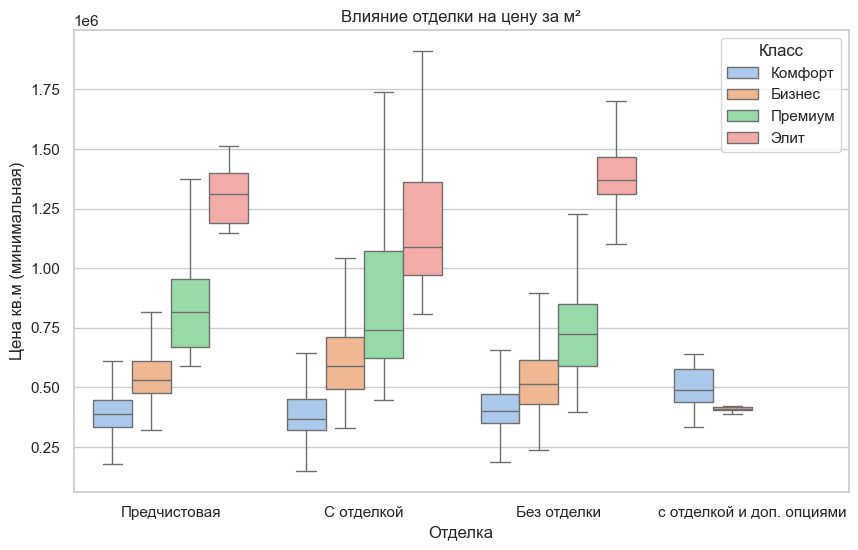

In [31]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_without_centr, x="Отделка", y="Цена кв.м (минимальная)",  hue="Класс", showfliers=False)
plt.title("Влияние отделки на цену за м²")
plt.show()

In [64]:
df["процент_скидки"] = (
    (df["Цена лота, руб."] - df["Цена со скидкой, руб."]) / df["Цена лота, руб."]
) * 100

In [65]:
top_процент_скидки = (
    df.groupby("Название проекта")[["процент_скидки"]]
    .max()
    .sort_values("процент_скидки", ascending=False)
    .head(10)
    .reset_index()
)

In [112]:
top_процент_скидки_dev = (
    df.groupby("Девелопер")[["процент_скидки"]]
    .max()
    .sort_values("процент_скидки", ascending=False)
    .head(10)
    .reset_index()
)

In [66]:
top_процент_скидки

,Название проекта,процент_скидки
0,Зорге 9,68.0
1,Страна. Заречная,38.002412
2,Level Бауманская,37.000002
3,Level Академическая,37.000001
4,Level Причальный,37.000001
5,Amber City,35.000001
6,Level Звенигородская,34.000005
7,Level Нижегородская,34.000004
8,Level Мичуринский,34.000003
9,Level Южнопортовая,34.000003


C:\Users\m.olshanskiy\AppData\Local\Temp\ipykernel_13344\796273334.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_процент_скидки, x="процент_скидки", y="Название проекта", palette="magma")


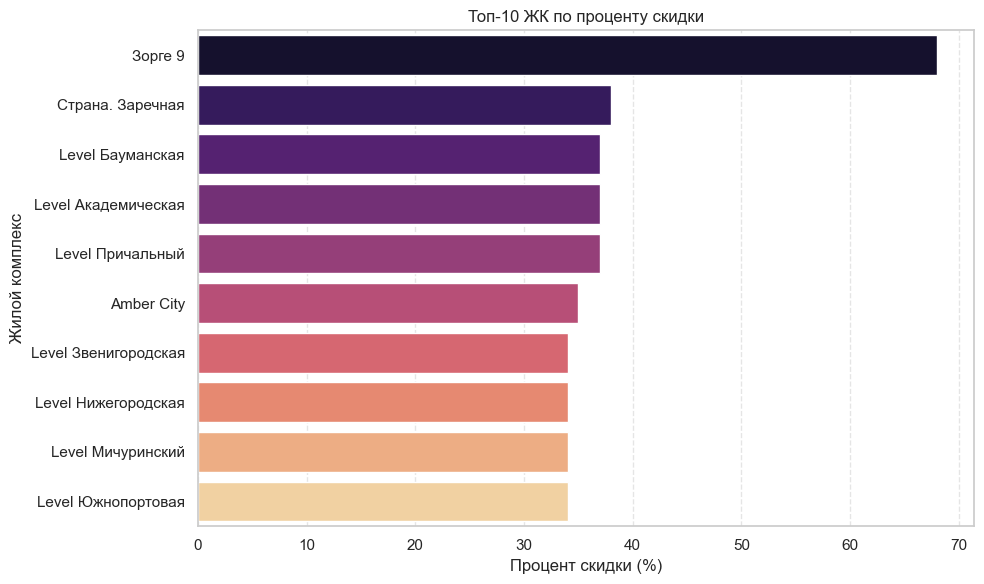

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_процент_скидки, x="процент_скидки", y="Название проекта", palette="magma")
plt.title("Топ-10 ЖК по проценту скидки")
plt.xlabel("Процент скидки (%)")
plt.ylabel("Жилой комплекс")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

C:\Users\m.olshanskiy\AppData\Local\Temp\ipykernel_13344\2066070335.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_процент_скидки_dev, x="процент_скидки", y="Девелопер", palette="magma")


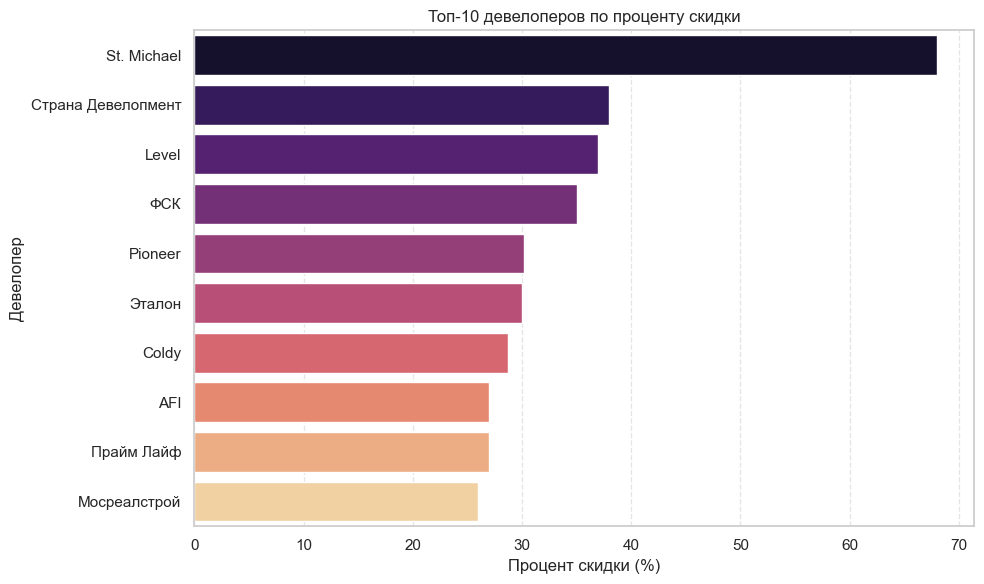

In [114]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_процент_скидки_dev, x="процент_скидки", y="Девелопер", palette="magma")
plt.title("Топ-10 девелоперов по проценту скидки")
plt.xlabel("Процент скидки (%)")
plt.ylabel("Девелопер")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [79]:
top_developers_by_area = df.groupby("Девелопер")["Площадь, кв.м"].sum().sort_values(ascending=False).head(10)

C:\Users\m.olshanskiy\AppData\Local\Temp\ipykernel_13344\4103040448.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_developers_by_area.values, y=top_developers_by_area.index, palette="viridis")


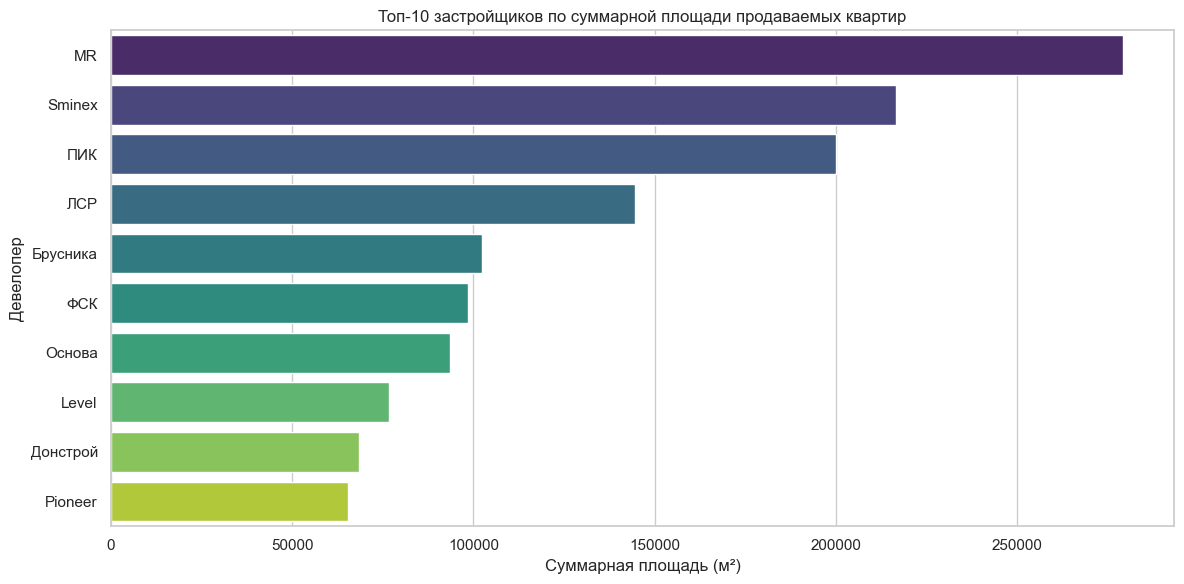

In [83]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_developers_by_area.values, y=top_developers_by_area.index, palette="viridis")
plt.title("Топ-10 застройщиков по суммарной площади продаваемых квартир")
plt.xlabel("Суммарная площадь (м²)")
plt.ylabel("Девелопер")
plt.tight_layout()
plt.show()

In [86]:
top_developers_by_count = df["Девелопер"].value_counts().head(10).reset_index()
top_developers_by_count.columns = ["Девелопер", "Количество квартир"]



C:\Users\m.olshanskiy\AppData\Local\Temp\ipykernel_13344\4082120699.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_developers_by_count, x="Количество квартир", y="Девелопер", palette="crest")


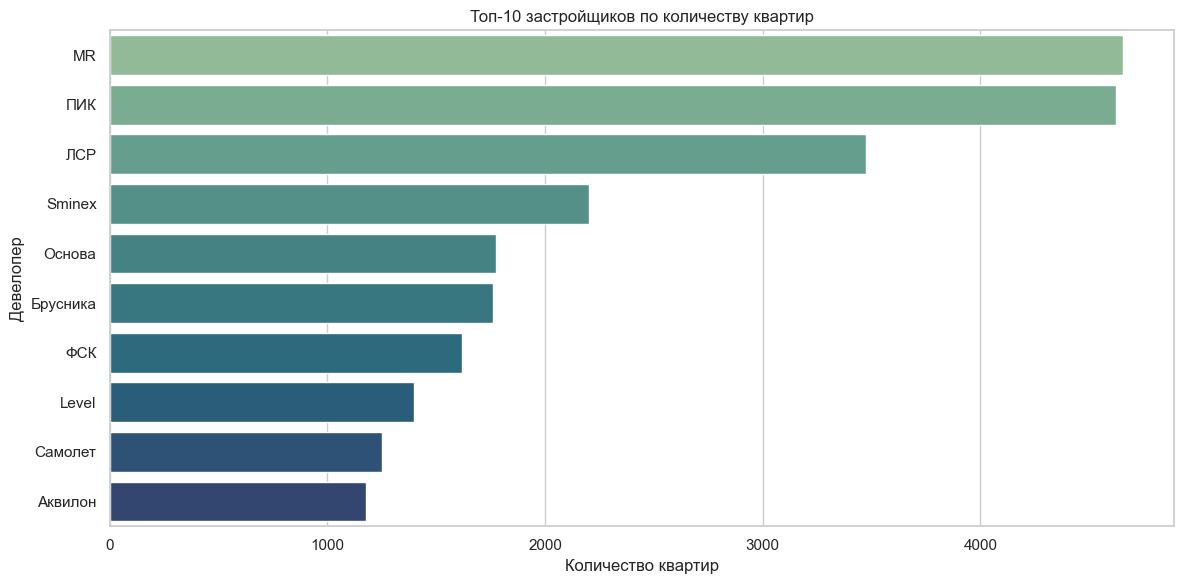

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_developers_by_count, x="Количество квартир", y="Девелопер", palette="crest")
plt.title("Топ-10 застройщиков по количеству квартир")
plt.xlabel("Количество квартир")
plt.ylabel("Девелопер")
plt.tight_layout()
plt.show()

In [115]:
df_centr = df[df['Округ'] == 'ЦАО']

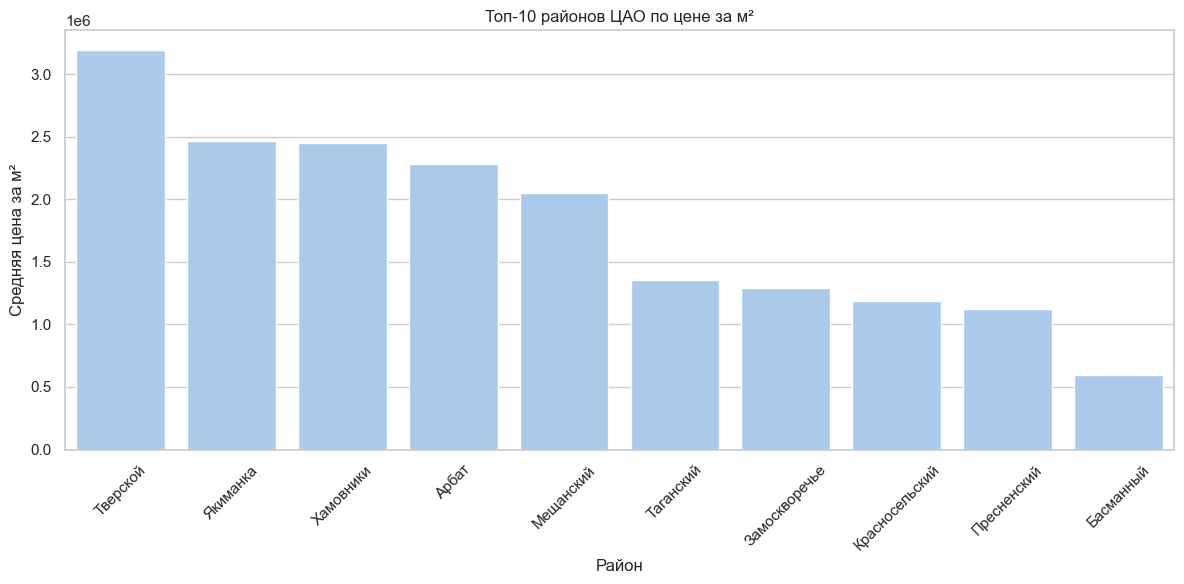

In [119]:
top_districts_centr = (
    df_centr.groupby("Район")["цена_за_м2"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_districts_centr.index, y=top_districts_centr.values)
plt.xticks(rotation=45)
plt.ylabel("Средняя цена за м²")
plt.title("Топ-10 районов ЦАО по цене за м²")
plt.tight_layout()
plt.show()

C:\Users\m.olshanskiy\AppData\Local\Temp\ipykernel_13344\528721089.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cheap_districts, x='цена_за_м2', y='Район', palette='Blues_r')


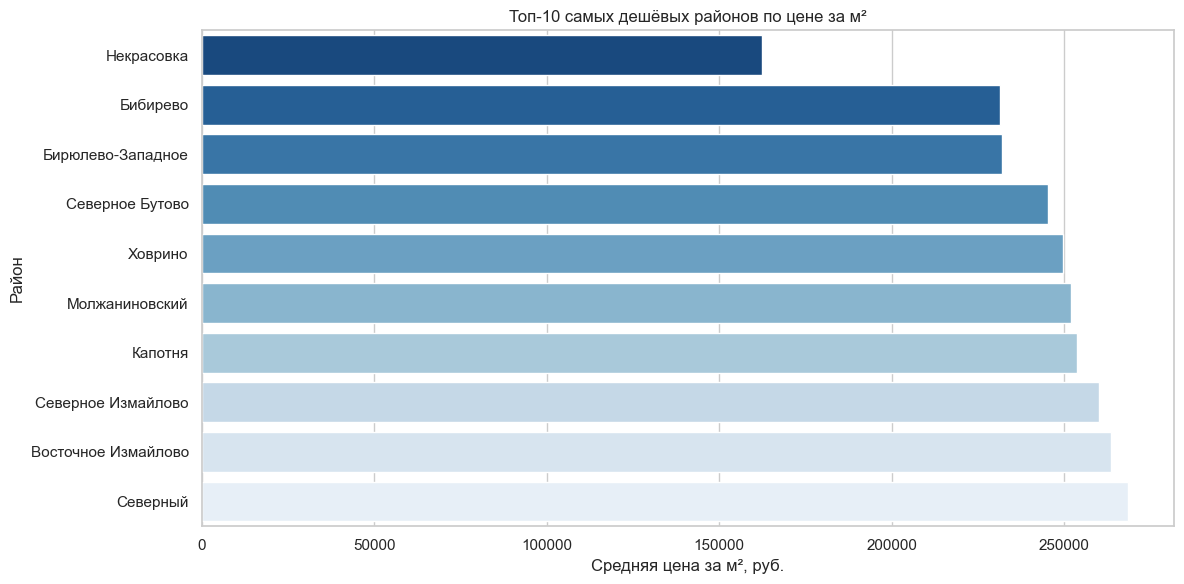

In [147]:
# Группировка по району и расчёт средней цены за м²
top_cheap_districts = (
    df.groupby('Район')['цена_за_м2']
    .mean()
    .sort_values()
    .head(10)
    .reset_index()
)

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=top_cheap_districts, x='цена_за_м2', y='Район', palette='Blues_r')

plt.title("Топ-10 самых дешёвых районов по цене за м²")
plt.xlabel("Средняя цена за м², руб.")
plt.ylabel("Район")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

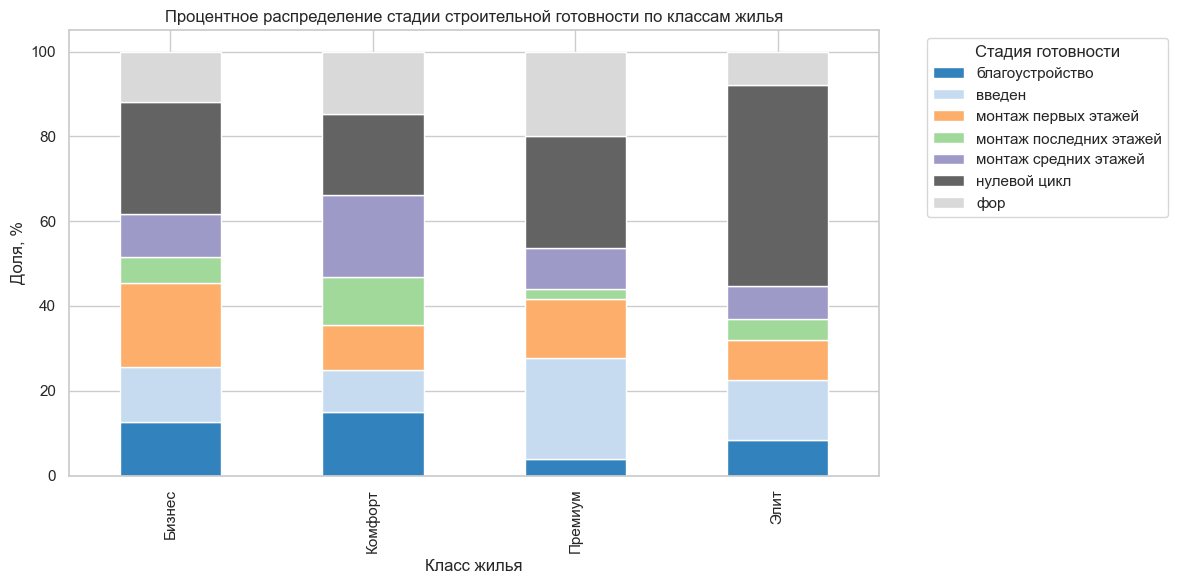

In [134]:
df["Готовность"] = df["Стадия строительной готовности"].str.strip().str.lower()




pivot = df.pivot_table(
    index="Класс жилья",
    columns="Готовность",
    aggfunc="size",
    fill_value=0
)


pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

plt.figure(figsize=(12, 6))
pivot_percent.plot(
    kind="bar",
    stacked=True,
    colormap="tab20c",
    figsize=(12, 6)
)

plt.title("Процентное распределение стадии строительной готовности по классам жилья")
plt.xlabel("Класс жилья")
plt.ylabel("Доля, %")
plt.legend(title="Стадия готовности", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


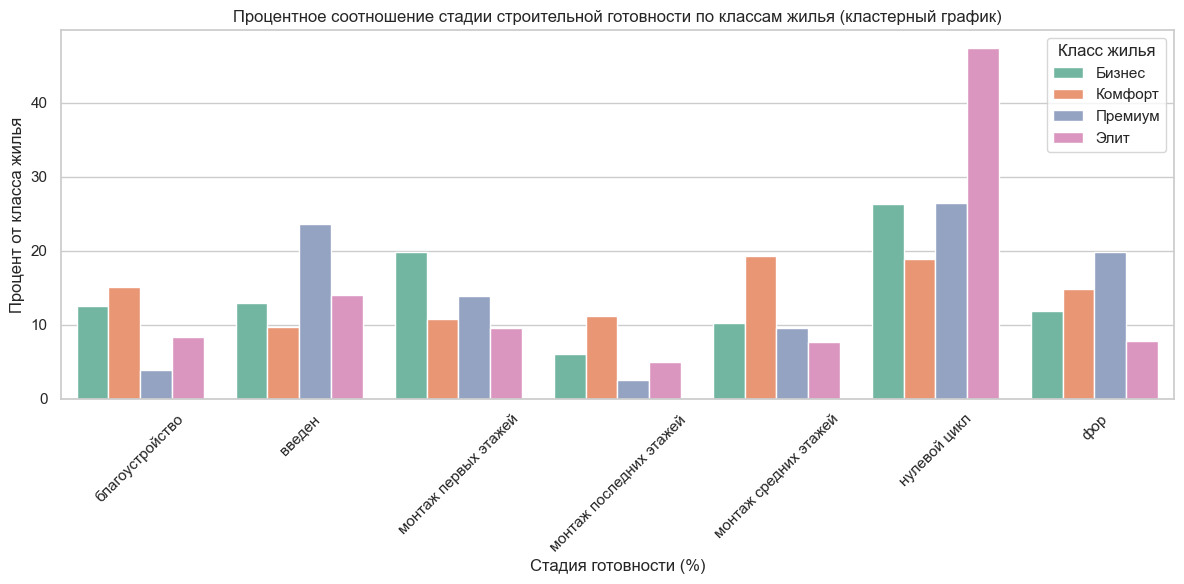

In [146]:
# Группировка и расчёт процентного соотношения
grouped = df.groupby(['Класс жилья', 'Готовность']).size().reset_index(name='count')

# Перевод в проценты внутри каждого класса жилья
grouped['percent'] = grouped.groupby('Класс жилья')['count'].transform(lambda x: 100 * x / x.sum())

# Переход в pivot для красивого графика
pivot = grouped.pivot(index='Готовность', columns='Класс жилья', values='percent').fillna(0)

# Перерисовка в длинный формат
melted = pivot.reset_index().melt(id_vars='Готовность', var_name='Класс жилья', value_name='Процент')

# Построение графика
plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Готовность', y='Процент', hue='Класс жилья', dodge=True, palette='Set2')

plt.title("Процентное соотношение стадии строительной готовности по классам жилья (кластерный график)")
plt.xlabel("Стадия готовности (%)")
plt.ylabel("Процент от класса жилья")
plt.legend(title='Класс жилья')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
df["Кол-во комнат"] = df["Кол-во комнат"].astype(str).str.strip()

pivot = df.pivot_table(
    index="Класс жилья",
    columns="Кол-во комнат",
    aggfunc="size",
    fill_value=0
)

# Переводим в проценты
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100


plt.figure(figsize=(12, 6))
pivot_percent.plot(
    kind="bar",
    stacked=True,
    colormap="Set3",
    figsize=(12, 6)
)

plt.title("Процентное распределение квартирографии по классам жилья")
plt.xlabel("Класс жилья")
plt.ylabel("Доля, %")
plt.legend(title="Количество комнат", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

KeyError: 'Класс жилья'

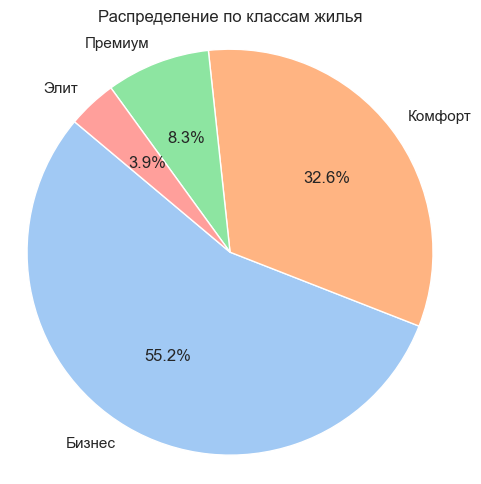

In [144]:
plt.figure(figsize=(5, 5))
class_counts = df["Класс жилья"].value_counts()

plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Распределение по классам жилья")
plt.axis('equal')  # круг, а не овал
plt.tight_layout()
plt.show()

In [84]:
name_dict = {'Сити Микс-Новокосино': 'СитиМикс Новокосино', 'Найс Лофт': 'Найс лофт', 'Cityzen': 'CITYZEN',
             'JOIS': 'Jois',
             'Павелецкая сити': 'Павелецкая Сити',
             'Квартал Серебряный Бор': 'Квартал Серебряный бор', 'Indy Towers ': 'Indy Towers',
             'AFI Park «Воронцовский': 'AFI Park Воронцовский',
             'Квартал «Издание»': 'Квартал Издание',
             'Квартал «МОНС»': 'Квартал «МОНС',
             'Новая Алексеевская Роща': 'Новая Алексеевская роща', 'Событие-2': 'Событие',
             'Событие-3': 'Событие', 'Событие-4': 'Событие', 'Headliner': 'headliner',
             'ЗИЛАРТ': 'Зиларт', 'Никольский квартал отрада ': 'Никольский квартал',
             'Аист резиденс': 'Аист Резиденс', 'Белая дача парк': 'Белая Дача парк', 'Зелёный парк': 'Зеленый парк',
             'Петровский парк II': 'Петровский парк ',
             'Котельники парк': 'Котельники Парк', 'РУСИЧ Кантемировский': 'Кантемировский',
             'Космический квартал': 'Космический Квартал', 'Цветочные поляны': 'Цветочные Поляны',
             'Nagatino i': 'Nagatino i-Land',
             'Riversky': 'RiverSky', 'Лужники Коллекшн': 'LUZHNIKI', 'Monodom Lake': 'Апарт-комплекс Monodom Lake',
             'Аквилон SIGNAL': 'SIGNAL', 'Аквилон BESIDE': 'BESIDE', 'Аквилон BESIDE 2.0': 'BESIDE 2.0',
             'Аквилон Митино': 'Митино', 'Баланс': 'balance', 'Хайд': 'Hide',
             'Новая Звезда-2': 'Новая Звезда', 'Новая Звезда, II очередь': 'Новая Звезда',
             'Новая Звезда, I очередь': 'Новая Звезда',
             'Мой адрес в Ватутинках': 'В Ватутинках', 'Мой адрес в Зеленограде': 'В Зеленограде',
             'Мой адрес на Амурской': 'На Амурской', 'Мой адрес на Варшавском 139': 'На Варшавском 139',
             'Мой адрес на Дмитровском 89': 'На Дмитровском 89', 'Мой адрес на Клинской': 'На Клинской',
             'Мой адрес на Люблинской 80 к7': 'На Люблинской 80 к7',
             'Мой адрес на Профсоюзной з/у 60/1': 'На Профсоюзной з/у 60/1',
             'Мой адрес на Салтыковской': 'На Салтыковской',
             'Мой адрес на Соколиной Горе': 'На Соколиной Горе', 'Мой адрес на Шелихова 9': 'На Шелихова 9',
             'Мой адрес на Щелковском 90к1': 'На Щелковском 90к1',
             'Мой адрес на Большой Филевской': 'На Большой Филевской',
             'UNO, Соколиная гора': 'UNO. Соколиная гора', 'UNO, Головинские пруды': 'UNO. Головинские пруды',
             'UNO, Горбунова': 'UNO. Горбунова',
             'UNO.Горбунова': 'UNO. Горбунова',
             'Лес': 'Комплекс апартаментов LES', 'Левел Лесной (Микрогород в лесу)': 'Level Лесной',
             'Элевен': 'Дизайнерский дом Eleven', 'Диалог': 'Dialog',
             'Лаврушинский 5': 'Лаврушинский', 'Белый град (Белый мыс)': 'Белый град', 'EVO': 'ЭВО',
             'Сколково Ван (Заречный квартал)': 'Skolkovo one', 'Liberty': 'Либерти', 'Влюберцы апарт-комплекс':
                 'Влюберцы', 'Гостиничный комплекс Аметист': 'Аметист', 'Лесная Отрада 2-я очередь': 'Отрада Лесная',
             'Лесная Отрада 1-я очередь': 'Отрада Лесная', 'Облака 2.0': 'Облака', 'Riga Hills': 'Рига Хиллс',
             'КИТ': 'Кит', 'Золотой, жилой квартал': 'Золотой', 'Саввинская 27 от Level': 'Саввинская 27 ',
             'Саввинская 17 от Level': 'Саввинская 17', 'Клубный дом Full House': 'Full House',
             'Апсайд Тауэрс': 'Upside Towers', 'LUZHNIKI': 'Luzhniki Collection', 'SOLE HILL (Соул хилл)': 'SOLE HILL',
             'На вертолетчиков': 'Мой адрес на Вертолетчиков', 'Комплекс апартаментов «Wellbe': 'Wellbe',
             'Дизайнерский дом Eleven': 'Eleven', "D'ORO MILLE": 'Доро Милле', 'Страна.Озёрная': 'Страна. Озерная',
             'Квартал «Метроном': 'Квартал Метроном', 'Квартал «Издание': 'Квартал Издание',
             'Квартал «МОНС': 'Квартал МОНС',
             'Balance': 'balance', 'Никитский-6': 'Никитский, 6', 'REPUBLIC': 'Republic',
             'Страна.Заречная': 'Страна. Заречная', 'Седьмое небо': '7 небо', 'ЛИТЕЙНЫЙ': 'Литейный',
             'Life-time': 'Life Time',
             'Андреевка Life': 'Андреевка Лайф', 'Береговой-2': 'Береговой 2', 'Весна': 'Весна (Ивантеевка)',
             'ЖК SOLE HILL (ЖК Соул хилл)': 'SOLE HILL', 'Дом-Мегалит в Королёве': 'Дом-Мегалит в Королеве',
             'Домодедово Парк Новый квартал': 'Домодедово парк. Новый квартал',
             'Внуково парк': 'Внуково Парк', 'Героев': 'Квартал Героев', 'МЫС – премиальный загородный проект': 'МЫС',
             'Одинград Квартал Семейный': 'Одинград. Квартал семейный', 'Олива Лесной городок': 'Олива',
             'Олимп 3': 'Олимп-3', 'Подлипки Город': 'Подлипки-Город', 'ПОЛЁТ-Купавна': 'Полет Купавна',
             'Сколково': 'Резиденции Сколково ', 'Пятницкое 58': 'Пятницкое, 58',
             'ул. Советская 18 (Мессиер 18)': 'Советская 18 (Мессиер 18)', 'Солнечный Парк': 'Солнечный Парк 2',
             'Страна.Парковая': 'Страна. Парковая', '31 квартал 3-я очередь': '31 Квартал',
             '31 Квартал 2-я очередь': '31 Квартал', '31 квартал': '31 Квартал', 'MOMENTS': 'Moments',
             'Пречистенка': 'Пречистенка 8', 'Зеленая Вертикаль': 'Зеленая вертикаль',
             'Ривер Парк': 'Ривер парк', 'Каштановая роща': 'Каштановая Роща',
             'Новоград монино': 'Новоград Монино', 'АРТ': 'Арт', 'RIVER HOUSE': 'Ривер хаус',
             'Пушкино Град': 'Пушкино град',
             'Видный Берег 2.0': 'Видный берег 2.0', 'ЭЛЬЙОН': 'Эльйон', 'INJOY': 'Injoy',
             'Тессинский, 1': 'Тессинский 1', 'Very на ботанической': 'Very на Ботанической',
             '1-ый Ленинградский': '1-й Ленинградский',
             'Борисоглебское-2': 'Борисоглебское',
             'Квартал Румянцево (Мелисад)': 'Квартал Румянцево',
             'Кронштадский 9': 'Кронштадтский 9',
             'Кронштадсткий 9': 'Кронштадтский 9',
             'Петровский парк 2': 'Петровский парк',
             'Пятницкое, 58 (Перец)': 'Пятницкое, 58',
             'РГ. Октябрьское поле': 'Октябрьское поле',
             'Резиденция Замоскворечье': 'Резиденции Замоскворечье',
             'Событие-1': 'Событие',
             'Событие-5': 'Событие',
             'Тринити-2': 'Тринити',
             'Тринити-3': 'Тринити',
             'Уно. Головинские пруды': 'UNO. Головинские пруды',
             'Фестиваль парк-2': 'Фестиваль парк',
             '1-ый Химкинский': '1-й Химкинский',
             'Восточный (НДВ)': 'Восточный',
             'Гранд Комфорт-2': 'Гранд Комфорт',
             'Легенда Корнево': 'Легенда Коренево',
             'Одинград Семейный': 'Одинград. Квартал семейный',
             'Одинград. Семейный': 'Одинград. Квартал семейный',
             'Светлый мир. Биополис': 'Светлый мир БиоПолиc',
             'Эко Видное 2.0': 'У реки. Эко Видное 2.0',
             'Форевилль': 'Foreville',
             'Войс Тауэрс': 'Voice Towers',
             'Афи Парк Воронцовский': 'AFI Park Воронцовский',
             'Афи Тауэр': 'Afi Tower',
             'Ривер парк': 'Riverpark',
             'Ривер парк Тауэрс Кутузовский': 'River Park Towers Кутузовский',
             'Виктори Парк Резиденс': 'Victory Park Residences',
             'Сити Микс': 'Citi-Mix',
             'Кэпитал Тауэрс': 'Capital Towers',
             'ОКО': 'МФК ОКО',
             'Скай Хаус': 'Sky House',
             'Ракурс': 'Rakurs',
             'Моментс': 'Moments',
             'Портленд': 'Portland',
             'Соул': 'Soul',
             'Ферст': 'FORST',
             'Культ': 'CULT',
             'Чкалов': 'Дом Chkalov',
             'Левел Академическая': 'Level Академическая',
             'Левел Бауманская': 'Level Бауманская',
             'Левел Звенигородская': 'Level Звенигородская',
             'Левел Мичуринский': 'Level Мичуринский',
             'Левел Нагатинская': 'Level Нагатинская',
             'Левел Нижегородская': 'Level Нижегородская',
             'Левел Причальный': 'Level Причальный',
             'Левел Селигерская': 'Level Селигерская',
             'Левел Стрешнево': 'Level Стрешнево',
             'Левел Южнопортовая': 'Level Южнопортовая',
             'Сити Бэй': 'City Bay',
             'Ситизен': 'CITYZEN',
             'Джойс': 'Jois',
             'Веер': 'VEER',
             'Мира': 'МИRA',
             'МОД': 'Mod',
             'Сет': 'SET',
             'Симфони 34': 'Symphony 34',
             'Слава': 'SLAVA',
             'Форум': 'FORUM',
             'Фэймос': 'Famous',
             'Сторис': 'Stories на Мосфильмовской',
             'Нью Форм  Аминьевское': 'Нью Форм Аминьевское',
             'Логос': 'Logos',
             'Сезар Сити': 'SEZAR CITY',
             'Фулл Хаус': 'Full House',
             'Энитео': 'Eniteo',
             'Твелв': 'Twelve',
             'Эвер': 'Ever',
             'Эра': 'ERA',
             'Шампань': 'Champine',
             'Спрингс': 'Springs',
             'Веспер Кутузовский': 'Vesper Кутузовский',
             'Лаки 1905': 'Lucky',
             'Эхэд': 'AHEAD',
             'Квартал Монс': 'Квартал МОНС',
             'Метроном': 'Квартал Метроном',
             'Аквилон Бисайд': 'BESIDE',
             'Аквилон Бисайд 2.0': 'BESIDE 2.0',
             'Инди Тауэрз': 'Indy Towers',
             'Долгоруковская, 25': 'Долгоруковская 25',
             'Кинетик': 'Kinetik',
             'Академик (Троицк)': 'Академик',
             'Монодом Лэйк': 'Апарт-комплекс Monodom Lake',
             'Билак Коломенское': 'Beluck Коломенское',
             'Май Приорити Басманная': 'MYPRIORITY Басманный',
             'Май Приорити Дубровка': 'MYPRIORITY Дубровка',
             'Май Приорити Мневники': 'MYPRIORITY Мневники',
             'Май Приорити Павелецкая': 'MYPRIORITY Павелецкая',
             'РЕКА': 'Река',
             'Соле Хиллс': 'SOLE HILL',
             'Инджой': 'Injoy',
             'Кутузовград 2': 'Кутузов Град',
             'Риверскай': 'RiverSky',
             'Топхиллс': 'TopHills',
             'Форивер': 'Foriver',
             'Вест Гарден': 'West Garden',
             'Лайф тайм (Онест)': 'Life time',
             'Олл ин Салют': 'Salut',
             'Ай лав - Счастье вместе': 'ilove',
             'Тэйт': 'Tate',
             'Хедлайнер': 'headliner',
             'Кристал': 'CRYSTAL Трилогия',
             'Дом Малевич': 'Дом MALEVICH',
             'Северный порт. Береговые кварталы.': 'Северный порт. Береговые кварталы',
             'Вейв': 'WAVE',
             'Обручева, 30': 'Обручева 30',
             'Кинг энд Санс': 'KING & SONS',
             'Мэйнстрит': 'Mainstreet',
             'Ред7': 'RED7',
             'Уно. Соколиная Гора': 'UNO. Соколиная гора',
             'Вери': 'Very на Ботанической',
             'Эмоушн': 'Emotion',
             'ЭвоПарк Измайлово': 'Evopark Измайлово',
             'ЭвоПарк Сокольники': 'Evopark Сокольники',
             'Наметкин Тауэр': 'Nametkin tower',
             'ФизтехСити': 'Физтехсити',
             'Иртышский квартал (2-й Иртышский)': '2-й Иртышский',
             'Барклая,6': 'Барклая 6',
             'Холланд парк': 'Holland park',
             'Хай Лайф': 'High Life',
             'Лайф Варшавская': 'Life Варшавская',
             'Опус': 'Opus',
             'Прайд': 'Pride',
             'Шифт': 'Shift',
             'Вэлби': 'Wellbe',
             'Дрим Рива': 'Dream Riva',
             'Дрим Тауэрс': 'Dream Towers',
             'Нева Тауэрс': 'NEVA TOWERS',
             'Инсайдер': 'INSIDER',
             'Рашин дизайн дистрикт': 'Russian Design District',
             'Союз': 'СОЮЗ',
             'Нова': 'NOVA',
             'Октябрьская 98 (МиррорЗдание)': 'Октябрьская 98',
             'Стремянный 2 (Амарант)': 'Стремянный 2',
             'Зе Файв': 'Five Towers',
             'Скай Вью': 'SkyView',
             'Проспект 39( Дистрикт 39)': 'Проспект 39',
             'СберСити': 'Сберсити',
             'Восемь кленов': '8 Кленов',
             'ВАУ': 'WOW',
             'Страна Заречная': 'Страна. Заречная',
             'Страна Озерная': 'Страна. Озерная',
             'Экотауэр Крылатское (Крылатская33)': 'Клубный квартал Крылатская 33',
             'Диус': 'DIUS',
             'Деко Резиденс': 'Deco Residence',
             'Вест Тауэр': 'West Tower',
             'Легаси': 'Legacy',
             'Оникс': 'Onyx',
             'Стеллар Сити': 'Stellar City',
             'Амбер Сити': 'Amber City',
             'Роттердам': 'Rotterdam',
             'Сидней Прайм': 'Sydney Prime',
             'Сидней Сити': 'Sydney City',
             'Скай Гарден': 'Sky Garden',
             'Селф': 'Self',
             'Воксхолл': 'Voxhall',
             'Мариинн': 'Mariinn Park',
             'Нагатино айленд': 'Nagatino i-Land',
             'Шагал': 'Shagal',
             'Джи Три Театральный': 'G3 Театральный',
             'Олимп': 'Олимп (Хотьково)',
             'Две столицы': 'Две Столицы',
             'По ул. Макаренко': 'по ул. Макаренко',
             'Белый град': 'Белый Град',
             'Мытищи-Сити': 'Мытищи Сити',
             'Москворецкий': 'Москворецкий (Тучково)',
             'Спутник': 'Sky Sputnik',
             'Мытищи-парк': 'Мытищи Парк',
             'Учебный 9': 'в пер. Учебный',
             'Адрес': 'Adres',
             'Бакеево парк': 'Бакеево Парк',
             'Трилогия CRYSTAL': 'CRYSTAL Трилогия',
             'Дом «А': 'Дом А',
             'tate': 'Tate',
             'в пер. Учебный': 'Солнечный'

             }



developer_dict = {'ООО ТК Алладин': 'ТК Алладин',
                  'Pioneer Finance': 'Pioneer',
                  'AFI Development': 'AFI',
                  'ДСК': 'ФСК',
                  'Тройка Рэд': '3-RED',
                  'MR Group': 'MR',
                  'Садовое кольцо ГК' : 'Садовое кольцо ',
                  'Патек Групп': 'ПАТЕК Групп',
                  'AEON': 'Аеон',
                  '494УНР': '494 УНР',
                  'Bestcon': 'Бесткон',
                  'Колди (Coldy)': 'Колди',
                  "Монарх" : 'МонАрх',
                  'Среда ': 'Среда',
                  'SisDevelopment': 'СИСдевелопмент',
                  'STONE': 'Стоун',
                  'Sun Development': 'ГК Sun Development',
                  'Левел': 'Level',
                  'Regions Development': 'Регионы',
                  'ООО «СЗ УНИВЕРСАЛЬ»': 'СЗ Универсаль',
                  'ДСК-1' : 'ФСК',
                  '1-ДСК': 'ФСК',
                  'Крост' : 'КРОСТ',
                  'ГК Березовец': 'Березовец',
                  'Девелопмент 120' : 'Девелопмент 54',
                  'Инвест-Строй' : 'Инвестстрой',
                  'Ругрупп Девелопмент' : 'Альфа Проджект',
                  'BTR Group' : 'БТР Групп',
                  'DOGMA' : 'Догма',
                  'Magnum' : 'Магнум',
                  'RDI' : 'Ар Ди Ай',
                  'Инвестстройкомплекс' : 'Инвестстрой',
                  'Ипотечная компания М-6' : 'Стройтек',
                  'ПроГород' : 'Level',
                  'УК СЕТЬСТРОЙ БАЛАШИХА' : 'Сетьстрой',
                  'Имена' : 'СЗ Элита-Эко',
                  'Град' : 'ГРАД',
                  '3S_Group' : '3S Group',
                  'АФИ' : 'AFI',
                  'Capital Group' : 'Capital group',
                  'Колди' : 'Coldy',
                  'Форма' : 'Forma',
                  'GloraX' : 'Glorax',
                  'Хаттон' : 'Hutton Development',
                  'Хаттон Девелопмент' : 'Hutton Development',
                  'IKON Development' : 'IKON',
                  'Стрелецкая Слобода' : 'INSIGMA',
                  'LEGENDA Intelligent Development' : 'LEGENDA',
                  'Sense Development' : 'Sense',
                  'Текта' : 'Tekta',
                  'Веспер' : 'Vesper',
                  'ВиХолдинг' : 'Ви Холдинг',
                  'ГАЛС' : 'Галс',
                  'Родина Групп' : 'Группа Родина',
                  'ЕВРОФАРМАКОЛ' : 'Еврофармакол',
                  'СЗ Спартак' : 'ПАТЕК Групп',
                  'РГ-ДЕВЕЛОПМЕНТ' : 'РГ',
                  'СТ Тауэрс' : 'Ренессанс',
                  'Холдинг «РСТИ» (Росстройинвест)' : 'РСТИ',
                  'ГК Сумма Элементов' : 'Сумма Элементов',
                  'СЗ ГРАД ПЛАЗА' : 'ГРАД',
                  'Профи Инвест' : 'ПРОФИ-Инвест',
                  'Профи-Инвест' : 'ПРОФИ-Инвест',
                  "Дар" : "DAR",
                  'СЗ Галакс+' : 'Галакс',
                  '494 УНР' : 'УНР 494',
                  'Плюс Девелопмент' : 'Плюс девелопмент',
                  'РГ-ДЕВЕЛОРМЕНТ' : 'РГ',
                  'С3 Ключ' : 'СЗ Ключ',
                  'ЦентрЖилСервис-2010' : 'ЦентрЖилСервис-2012',
                  'ЭКДевелопмент' : 'Э.К. Девелопмент',
                  'Айкон' : 'IKON',
                  'Ферро-Строй' : 'Ферро-строй',
                  'СЗ Полёт' : 'СЗ-Полет',
                  'Ин-Групп (Тула)' : 'Ин-Групп',
                  'ООО «СЗ «ЛИТЕЙНЫЙ.ЛАЙФ»' : 'СЗ ЛИТЕЙНЫЙ.ЛАЙФ',
                  'Квартал Инвестстрой' : 'Квартал-Инвестстрой',
                  'МЕССИЕР-ДЕВЕЛОПМЕНТ' : 'Мессиер-Девелопмент',
                  'Аверус' : 'СЗ АВЕРУС',
                  'Ди Эм Холдинг' : 'ДМ Холдинг',
                  'Риверхаус' : 'СЗ Риверхаус',
                  'СЗ Бест Проект': 'СЗ Бест-Проект',
                  'СЗ Сантерра' : 'Сантерра',
                  'СК Зеленоградский' : 'Сибпромстрой',
                  'СМУ 29' : 'СМУ-29',
                  'Эс Ди Ай' : 'КОМФОРТИНВЕСТ',
                  'ГК Монолит' : 'Монолит',
                  'Сити21' : 'Сити 21 век',
                  'ГК Мега-Мечта' : 'Мега-мечта',
                  'Глоракс' : 'Glorax',
                  'ООО СЗ "ИРИСТОН"' : 'СЗ ИРИСТОН',
                  'Галакс' : 'Галакс+',
                  'Проксима-1' : 'ПРОКСИМА-1',
                  'Спсити' : 'СПСИТИ',
                  'Техноолимпстрой' : 'ТехноСтройОлимп',
                  'Джи Три Илинский' : 'G3 Group',
                  'СЗ ДЖИ ТРИ ИЛЬИНСКИЙ' : 'G3 Group',
                  'BAZA Development' : 'Baza',
                  'Эдельвейс (Москва)' : 'Центрстрой',
                  'СЗ ВЭЛЛБИ' : 'Равновесие Капитал',
                  'Апрелевка С2' : 'СИТ',
                  'СЗ СИЯНИЕ' : 'Строй Сервис',
                  'Мегаполис Груп' : 'Capital group',
                  'Ingrad' : 'Sminex',
                  'Апсайд Тауэрс' : 'СМУ-6',
                  'ANT Development' : 'Ant Development',
                  'АСРесурс' : 'Авиаспецресурс',
                  'ГК Садовое кольцо' : 'Садовое кольцо',
                  'СЗ Третий Рим (Москва)' : 'СЗ Третий Рим',
                  'Инвест Траст' : 'ИнвестТраст',
                  'СК ВЫБОР' : 'Выбор',
                  'ГК Основа' : 'Основа',
                  'Хант-Холдинг' : 'Прайм Лайф',
                  '3SGroup' : '3S Group',
                  'ДСК 1' : 'ФСК',
                  'Gravion' : 'Гравион',
                  'Ikon' : 'IKON',
                  'Level Group' : 'Level',
                  'MAGNUM' : 'Магнум',
                  'MR Group/Левел Групп' : 'Level',
                  'Sezar' : 'Sezar Group',
                  'StMichael' : 'St. Michael',
                  'Tekta Group' : 'Tekta',
                  'Touch' : 'TOUCH',
                  'Unikey' : 'Юникей',
                  'Абсолют Недвижимость' : 'Абсолют',
                  'Апсайд'  : 'Upside Development',
                  'БЭЛ' : 'БЭЛ Девелопмент',
                  'Левел Групп' : 'Level',
                  'Легенда' : 'LEGENDA',
                  'Октобер групп' : 'October Group',
                  'Пионер' : 'Pioneer',
                  'Плюс девелопмент' : 'PLUS Development',
                  'РГ-Девелопмент' : 'РГ',
                  'Родина' : 'Группа Родина',
                  'Самолет Девелопмент' : 'Самолет',
                  'Самолет (МИЦ)' : 'Самолет',
                  'Сезар' : 'Sezar Group',
                  'СЗ 5 Донской' : 'СЗ 5 ДОНСКОЙ',
                  'Смайнекс' : 'Sminex',
                  'Смайнекс (Инград)' : 'Sminex',
                  'СМУ-6 Инвестиции' : 'СМУ-6',
                  'Среда (ПИК)' : 'Среда',
                  'Сумма элементов' : 'Сумма Элементов',
                  'Тач' : 'TOUCH',
                  'Центр Инвест' : 'Центр-Инвест',
                  'Glorax Development' : 'Glorax',
                  'Арс' : 'АРС',
                  'Главстрой Девелопмент' : 'Главстрой',
                  'КОНЦЕПТ ИММО ДЕВЕЛОПМЕНТ' : 'ИММО ДЕВЕЛОПМЕНТ',
                  'Кошелев' : 'Корпорация КОШЕЛЕВ',
                  'Кошелев-Проект' : 'Корпорация КОШЕЛЕВ',
                  'Р Инвест' : 'Р-Инвест',
                  'Садовое Кольцо' : 'Садовое кольцо',
                  'УК Сетьстрой Балашиха' : 'Сетьстрой',
                  'Фонд' : 'Фонд развития территорий',
                  'Тренд-Групп' : 'Тренд групп',
                  'ФСК/Каскад' : 'ФСК',
                  'ПРАЙМ ЛАЙФ' : 'Прайм Лайф',
                  'СЗ БАЛЧУГ ДЕВЕЛОПМЕНТ' : 'СЗ БАЛЧУГ ЭСТЕЙТ',
                  'СЗ ИРИСТОН' : 'Тройка плюс'}

In [85]:
df_общий["Название проекта"] = df_общий["Название проекта"].replace(name_dict)
df_общий["Девелопер"] = df_общий["Девелопер"].replace(developer_dict)

In [278]:
# Столбцы, в которых нужно заполнить пропуски
columns_to_fill = ['На англ', 'Промзона', 'Местоположение',
                   'Метро', 'Расстояние до метро, км',
                   'Время до метро, мин', 'Мцк/мцд/бкл', 'Расстояние до мцк/мцд, км',
                   'Время до мцк/мцд, мин', 'Бкл', 'Расстояние до бкл, км',
                   'Время до бкл, мин', 'Старт', 'Комментарий',
                   'Округ', 'Район', 'Адрес', 'Эскроу', 'Статус', 'Конструктив', 'Класс', 'Старый срок сдачи',
                   'Договор']  # без статуса

In [277]:
df_общий = df_общий.sort_values(by=['Дата обновления', 'Название проекта', 'Девелопер', 'Корпус'])

In [284]:
for col in columns_to_fill:
    df_общий[col] = df_общий.groupby(['Название проекта', 'Девелопер'])[col].ffill()